<a href="https://colab.research.google.com/github/Mjcherono/Predicting-Disease-Spread/blob/main/dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DengAI: Predicting Disease Spread(Dengue)



### Problem Description
In cities where dengue is present, the disease is endemic. Globally, researchers estimate that dengue infects 390 million people per year ; however, only 50–100 million cases are detected due to the high asymptomatic rate . Estimating dengue burden can be problematic due to delays in case identification, strong intra- and inter-annual variation in incidence, and the majority of cases being clinically mild or asymptomatic . As a result, implementing effective vector control operations can be challenging. To overcome these issues, the development of accurate and timely early warnings systems capable of predicting future dengue incidence needs to be done.


### Determining Success Metrics.
For this project to be termed successful, if any of the models built achieve an accuracy of above 80% in prediction of total dengue cases.


### Experimental Design
*   Importing Libraries.
*   Loading dataset.
*   Data Cleaning and Preprocessing.
*   Exploratory data analysis.
*   Model Implementation.
*   Acccuracy check.





##### Libraries

In [1601]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

##### Loading data.

In [1602]:
#train

train=pd.read_csv("/content/dengue_features_train (1).csv")

In [1603]:
#preview of the head

train.head(5)

city  year  ...  station_min_temp_c station_precip_mm
0   sj  1990  ...                20.0              16.0
1   sj  1990  ...                22.2               8.6
2   sj  1990  ...                22.8              41.4
3   sj  1990  ...                23.3               4.0
4   sj  1990  ...                23.9               5.8

[5 rows x 24 columns]

In [1604]:
#shape

train.shape

(1456, 24)

In [1605]:
#Test data

test=pd.read_csv("/content/dengue_features_test (1).csv")

In [1606]:
# preview of head

test.head(5)

city  year  ...  station_min_temp_c station_precip_mm
0   sj  2008  ...                21.7              75.2
1   sj  2008  ...                22.2              34.3
2   sj  2008  ...                22.8               3.0
3   sj  2008  ...                24.4               0.3
4   sj  2008  ...                23.3              84.1

[5 rows x 24 columns]

In [1607]:
#shape

test.shape

(416, 24)

In [1608]:
#labels

labels=pd.read_csv("/content/dengue_labels_train.csv")

In [1609]:
labels.head(5)

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [1610]:
labels.shape

(1456, 4)

###### Merging datasets


In [1611]:
trainmerge=train.merge(labels,on=["city","year","weekofyear"],how="right")
trainmerge.shape


(1456, 25)

In [1612]:
trainmerge.head(10)

city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0   sj  1990          18  ...               20.0               16.0            4
1   sj  1990          19  ...               22.2                8.6            5
2   sj  1990          20  ...               22.8               41.4            4
3   sj  1990          21  ...               23.3                4.0            3
4   sj  1990          22  ...               23.9                5.8            6
5   sj  1990          23  ...               23.9               39.1            2
6   sj  1990          24  ...               23.3               29.7            4
7   sj  1990          25  ...               22.8               21.1            5
8   sj  1990          26  ...               22.8               21.1           10
9   sj  1990          27  ...               24.4                1.1            6

[10 rows x 25 columns]

Description of Dataset.


In [1613]:
#train
print(trainmerge.describe())
#test set
print(test.describe())

              year   weekofyear  ...  station_precip_mm  total_cases
count  1456.000000  1456.000000  ...        1434.000000  1456.000000
mean   2001.031593    26.503434  ...          39.326360    24.675137
std       5.408314    15.019437  ...          47.455314    43.596000
min    1990.000000     1.000000  ...           0.000000     0.000000
25%    1997.000000    13.750000  ...           8.700000     5.000000
50%    2002.000000    26.500000  ...          23.850000    12.000000
75%    2005.000000    39.250000  ...          53.900000    28.000000
max    2010.000000    53.000000  ...         543.300000   461.000000

[8 rows x 23 columns]
              year  weekofyear  ...  station_min_temp_c  station_precip_mm
count   416.000000  416.000000  ...          407.000000         411.000000
mean   2010.766827   26.439904  ...           22.368550          34.278589
std       1.434835   14.978257  ...            1.731437          34.655966
min    2008.000000    1.000000  ...           14.200000 

In [1614]:
#summary of the combined set
print(trainmerge.info())

#test
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

the merged dataset has 1456 observations and 25 columns,2 objects, 3 integer values and 20 float columns.

In [1615]:
#Checking on target variable
trainmerge.total_cases.value_counts()

0      100
6       71
3       70
5       70
2       69
      ... 
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

Changing week start date to date time.

In [1616]:
trainmerge.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [1617]:
#train test
trainmerge['week_start_date']=pd.to_datetime(trainmerge['week_start_date'],
                                             format='%Y/%m/%d')

#test set
test['week_start_date']=pd.to_datetime(test['week_start_date'],
                                             format='%Y/%m/%d')


###### Separating entries based on cities.

In [1618]:
# create new datasets
#train
sj = trainmerge[trainmerge['city'] == 'sj']
iq = trainmerge[trainmerge['city'] == 'iq']

#tests
sj_test = test[test['city'] == 'sj']
iq_test = test[test['city'] == 'iq']

In [1619]:
sj.shape

(936, 25)

In [1620]:
iq.shape

(520, 25)

In [1621]:
sj_test.shape

(260, 24)

In [1622]:
iq_test.shape

(156, 24)

###### Checking for null values

In [1623]:
#San Juan data
print(sj.isnull().sum())

#san juan test
print(sj_test.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [1624]:
#Geting the percentage of missing data

print(sj.isnull().sum()/len(sj)*100)

#test
sj_test.isnull().sum()/len(sj)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  20.405983
ndvi_nw                                   5.235043
ndvi_se                                   2.029915
ndvi_sw                                   2.029915
precipitation_amt_mm                      0.961538
reanalysis_air_temp_k                     0.641026
reanalysis_avg_temp_k                     0.641026
reanalysis_dew_point_temp_k               0.641026
reanalysis_max_air_temp_k                 0.641026
reanalysis_min_air_temp_k                 0.641026
reanalysis_precip_amt_kg_per_m2           0.641026
reanalysis_relative_humidity_percent      0.641026
reanalysis_sat_precip_amt_mm              0.961538
reanalysis_specific_humidity_g_per_kg     0.641026
reanalysis_tdtr_k                         0.641026
station_avg_temp_c             

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  4.594017
ndvi_nw                                  1.175214
ndvi_se                                  0.106838
ndvi_sw                                  0.106838
precipitation_amt_mm                     0.213675
reanalysis_air_temp_k                    0.213675
reanalysis_avg_temp_k                    0.213675
reanalysis_dew_point_temp_k              0.213675
reanalysis_max_air_temp_k                0.213675
reanalysis_min_air_temp_k                0.213675
reanalysis_precip_amt_kg_per_m2          0.213675
reanalysis_relative_humidity_percent     0.213675
reanalysis_sat_precip_amt_mm             0.213675
reanalysis_specific_humidity_g_per_kg    0.213675
reanalysis_tdtr_k                        0.213675
station_avg_temp_c                       0.213675


We wont drop any columns since it's within the threshhold.

###### Imputing missing data


In [1625]:
#Imputing using forward fill.

sj.fillna(method='ffill',inplace=True)
sj.isnull().sum()

#test
sj_test.fillna(method='pad',inplace=True)
sj_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [1626]:
#Iquitos data
#train
print(iq.isnull().sum())

#test
print(iq_test.isnull().sum())

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [1627]:
#checking on percentages 
#train
print(iq.isnull().sum()/len(iq)*100)

#test
print(iq_test.isnull().sum()/len(iq)*100)

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.576923
ndvi_nw                                  0.576923
ndvi_se                                  0.576923
ndvi_sw                                  0.576923
precipitation_amt_mm                     0.769231
reanalysis_air_temp_k                    0.769231
reanalysis_avg_temp_k                    0.769231
reanalysis_dew_point_temp_k              0.769231
reanalysis_max_air_temp_k                0.769231
reanalysis_min_air_temp_k                0.769231
reanalysis_precip_amt_kg_per_m2          0.769231
reanalysis_relative_humidity_percent     0.769231
reanalysis_sat_precip_amt_mm             0.769231
reanalysis_specific_humidity_g_per_kg    0.769231
reanalysis_tdtr_k                        0.769231
station_avg_temp_c                       7.115385


Equally no dropping of columns they are all below 20%

Filling missing values in Iquitos data.

In [1628]:
#Imputed for missing values using forward fill method.
#train
iq.fillna(method='pad', inplace=True)
iq.isnull().sum()

#test
iq_test.fillna(method='pad', inplace=True)
iq_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

###### Duplicated Values


In [1629]:
#duplicated on Iquitos
#train
print(iq.duplicated().sum())
#test
print(iq_test.duplicated().sum())

0
0


In [1630]:
#duplicated on san juan
#train
print(sj.duplicated().sum())

#test
print(sj_test.duplicated().sum())

0
0


In [1631]:
sj.head()

city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0   sj  1990          18  ...               20.0               16.0            4
1   sj  1990          19  ...               22.2                8.6            5
2   sj  1990          20  ...               22.8               41.4            4
3   sj  1990          21  ...               23.3                4.0            3
4   sj  1990          22  ...               23.9                5.8            6

[5 rows x 25 columns]

###### Outliers

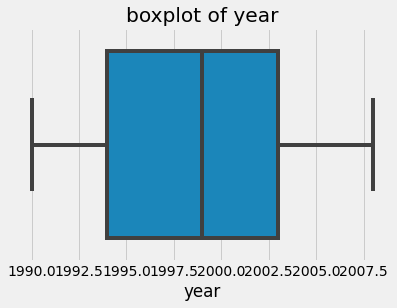

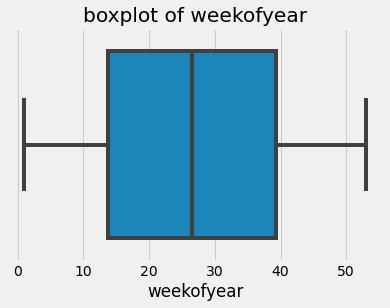

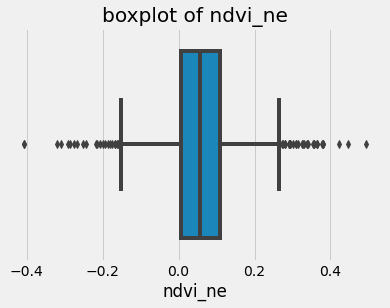

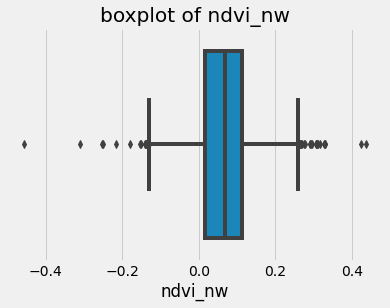

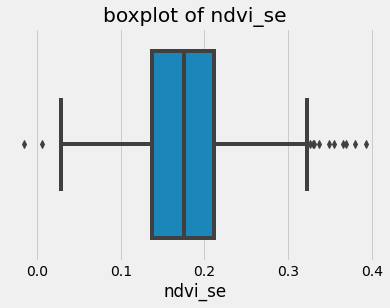

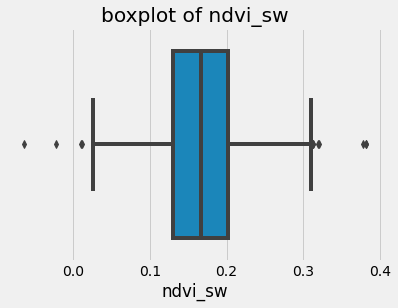

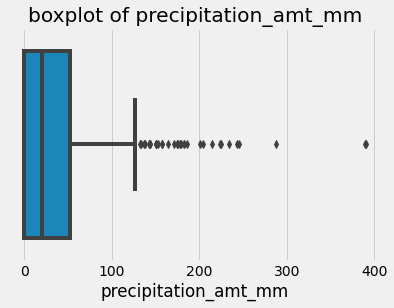

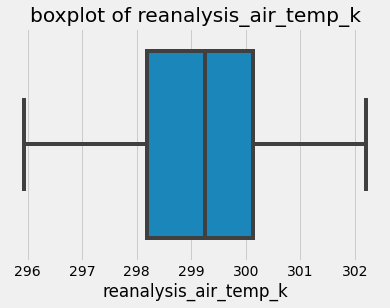

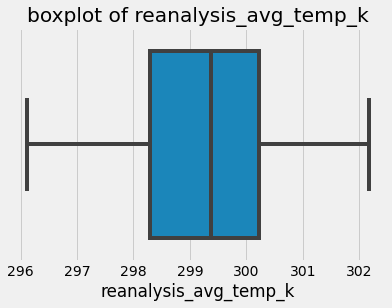

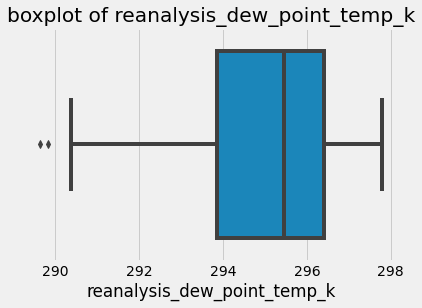

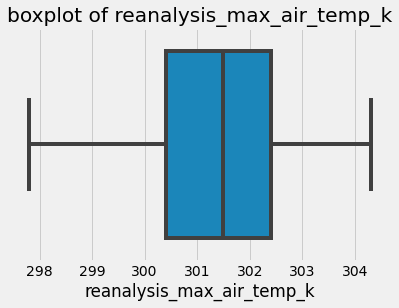

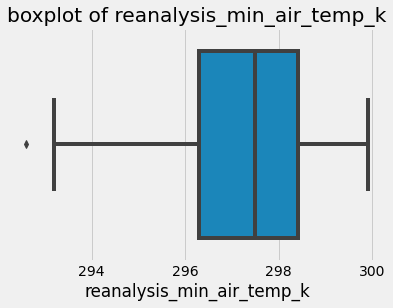

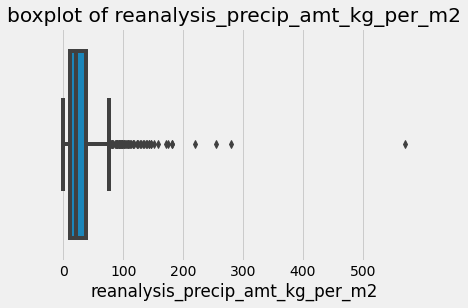

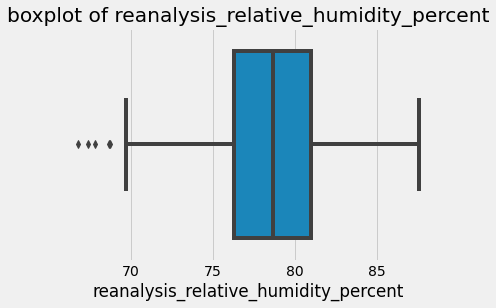

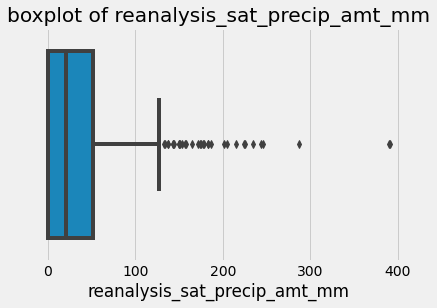

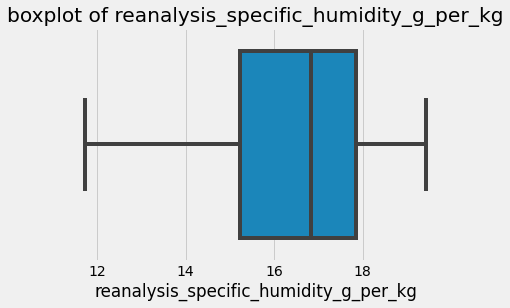

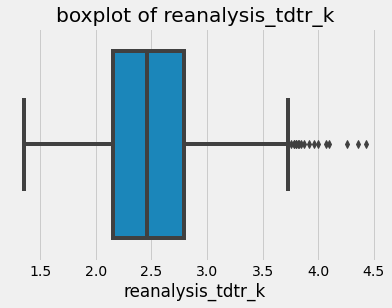

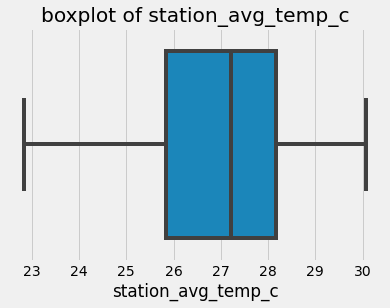

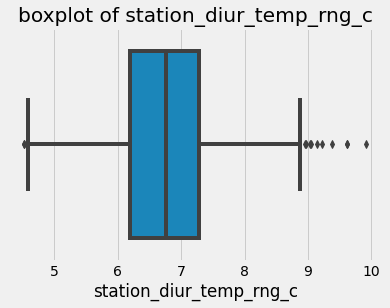

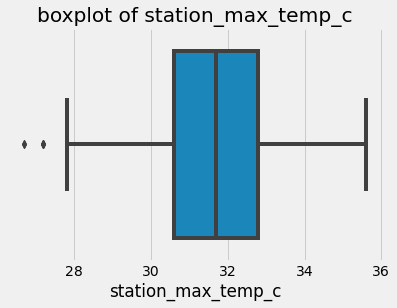

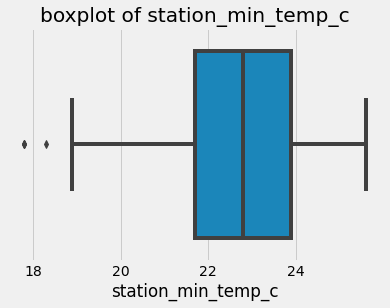

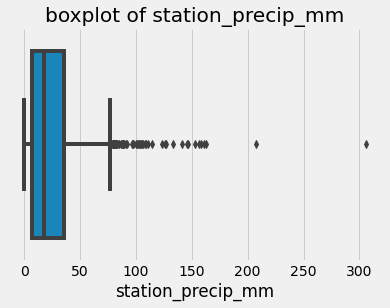

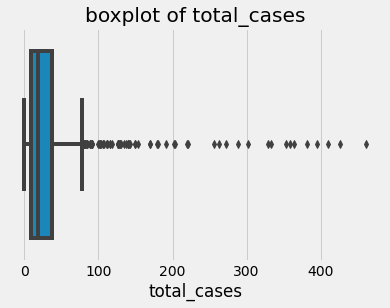

In [1632]:
#Numeric features
sj_num = sj.drop(['city','week_start_date'],axis=1)

colnames = list(sj_num.columns)
for i in colnames:
    plt.title(f'boxplot of {i}')
    sns.boxplot(sj_num[i])
    plt.show()



*   The outliers on NDVI columns won't be gotten rid of since they indicate areas with extreme cases in terms of vegetation cover. That at 0 and below corresponds to barren areas of rock or sand/ snow .Moderate values where the interquatile range is at represents shrubs and grasslands while high values represent temperature and tropical rainforests.



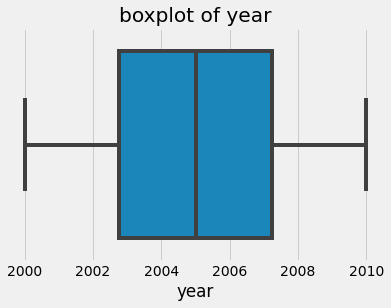

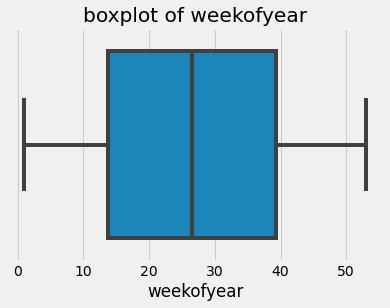

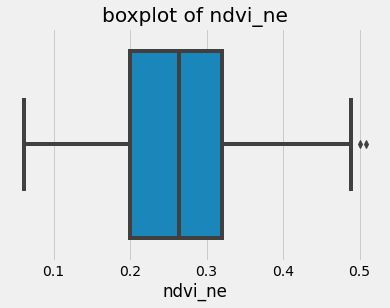

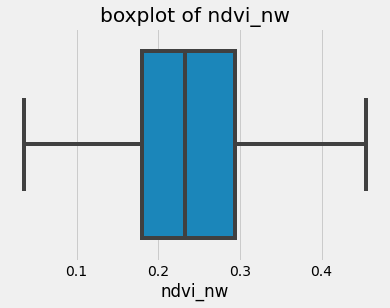

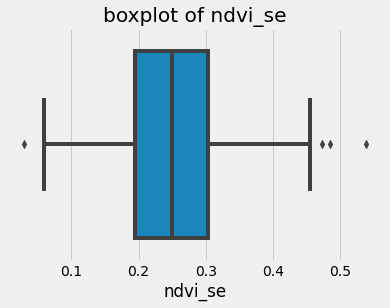

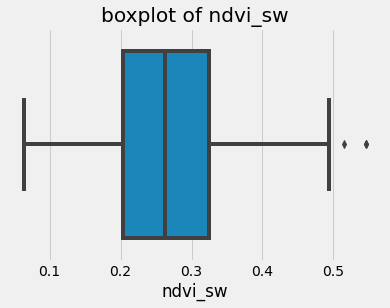

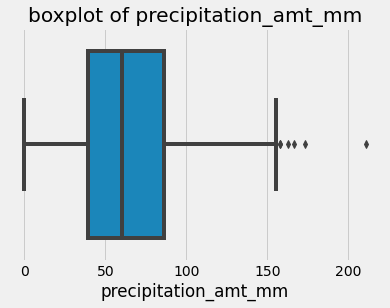

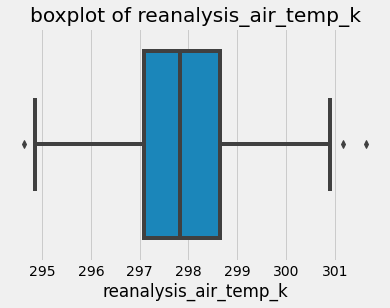

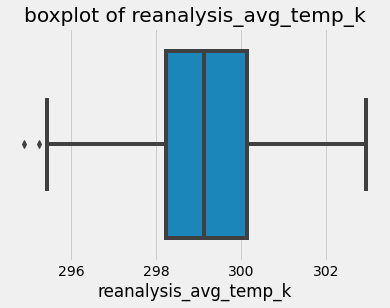

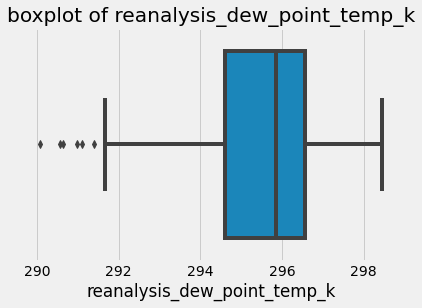

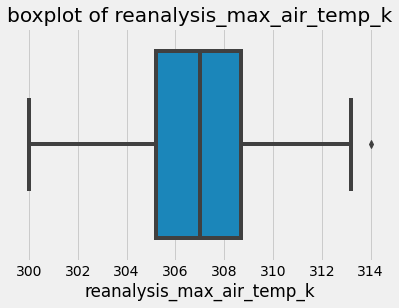

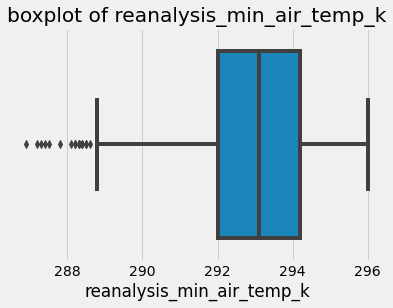

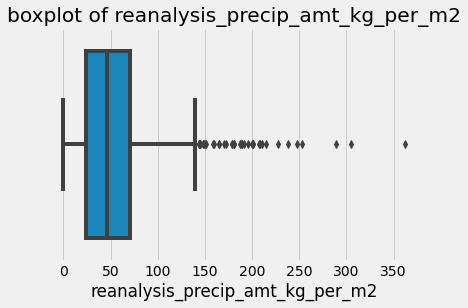

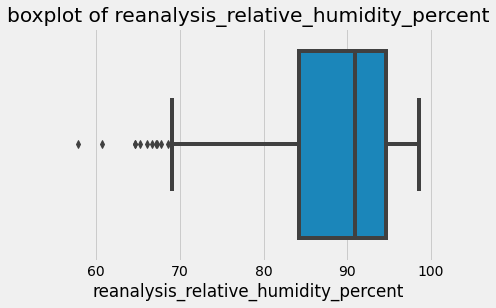

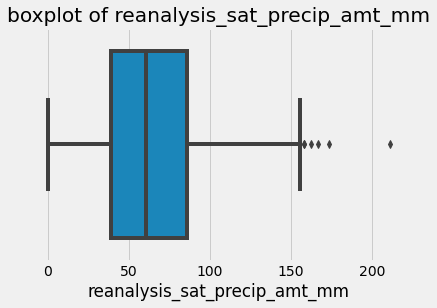

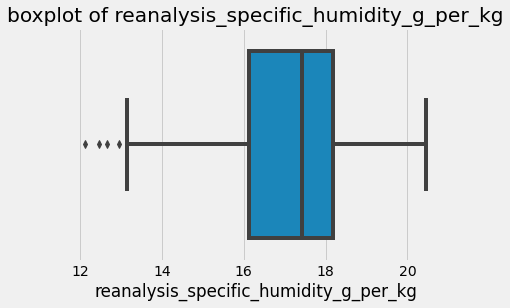

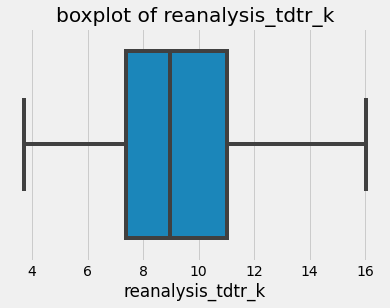

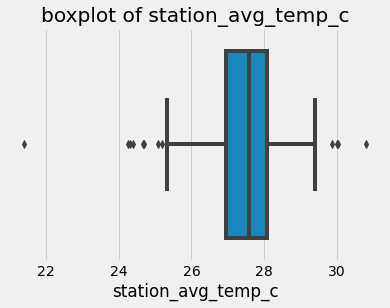

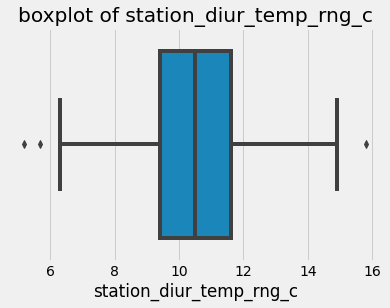

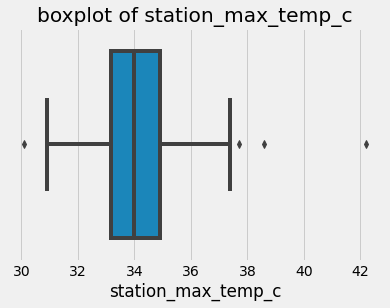

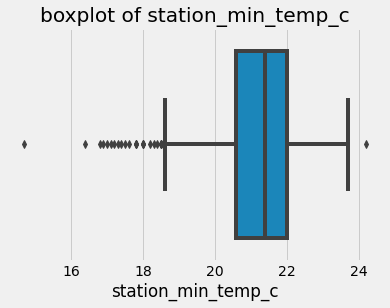

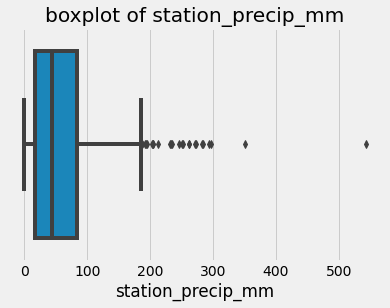

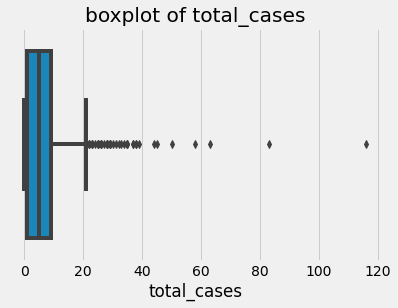

In [1633]:
#Numeric features
iq_num = iq.drop(['city','week_start_date'],axis=1)

colnames = list(iq_num.columns)
for i in colnames:
    plt.title(f'boxplot of {i}')
    sns.boxplot(iq_num[i])
    plt.show()

Description of data


In [1634]:
#train
print(sj.describe())
print(iq.describe())

              year  weekofyear  ...  station_precip_mm  total_cases
count   936.000000  936.000000  ...         936.000000   936.000000
mean   1998.826923   26.503205  ...          26.756838    34.180556
std       5.212076   15.021909  ...          29.264050    51.381372
min    1990.000000    1.000000  ...           0.000000     0.000000
25%    1994.000000   13.750000  ...           6.875000     9.000000
50%    1999.000000   26.500000  ...          17.650000    19.000000
75%    2003.000000   39.250000  ...          35.350000    37.000000
max    2008.000000   53.000000  ...         305.900000   461.000000

[8 rows x 23 columns]
              year  weekofyear  ...  station_precip_mm  total_cases
count   520.000000  520.000000  ...         520.000000   520.000000
mean   2005.000000   26.503846  ...          61.581346     7.565385
std       2.918283   15.029450  ...          62.968520    10.765478
min    2000.000000    1.000000  ...           0.000000     0.000000
25%    2002.750000   13.7

In [1635]:
#test
print(sj_test.describe())
print(iq_test.describe())

              year  weekofyear  ...  station_min_temp_c  station_precip_mm
count   260.000000  260.000000  ...          260.000000         260.000000
mean   2010.326923   26.503846  ...           23.096538          34.001538
std       1.492855   15.043951  ...            1.499919          36.175220
min    2008.000000    1.000000  ...           20.000000           0.000000
25%    2009.000000   13.750000  ...           21.700000           7.175000
50%    2010.000000   26.500000  ...           23.050000          22.100000
75%    2012.000000   39.250000  ...           24.400000          48.250000
max    2013.000000   53.000000  ...           26.700000         207.700000

[8 rows x 22 columns]
              year  weekofyear  ...  station_min_temp_c  station_precip_mm
count   156.000000  156.000000  ...          156.000000         156.000000
mean   2011.500000   26.333333  ...           21.152564          33.897436
std       0.960511   14.915821  ...            1.318428          31.842514
mi

### Exploratory Data Analysis.

#### Univariate Analysis.


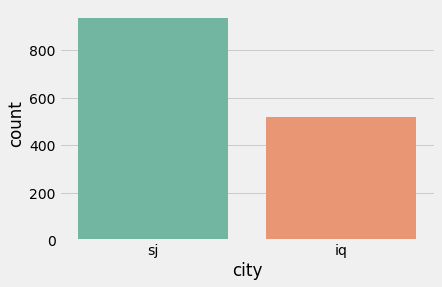

In [1636]:
#train
sns.countplot(x="city",data=trainmerge,palette = "Set2")


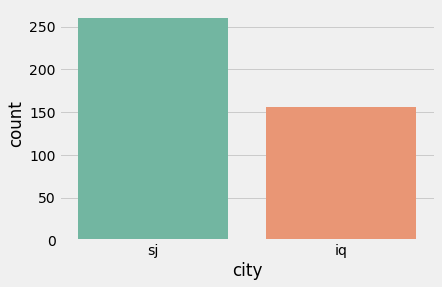

In [1637]:
#test
sns.countplot(x="city",data=test,palette = "Set2")


San Juan,Puerto Rico.

In [1638]:
# Getting min and max value of week start dates
sj['week_start_date'].min(),sj['week_start_date'].max()

(Timestamp('1990-04-30 00:00:00'), Timestamp('2008-04-22 00:00:00'))

0
461


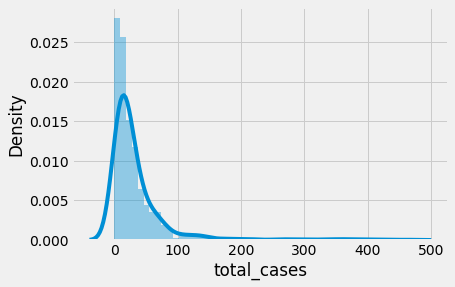

In [1639]:
# getting min value of total cases
print(sj['total_cases'].min())

# getting max value of total cases
print(sj['total_cases'].max())

#Plotting the distribution of total cases
sns.distplot(sj.total_cases)
plt.show()

Most entries done for total cases were at 0 to 50 and those at a 100and above 100 are less.

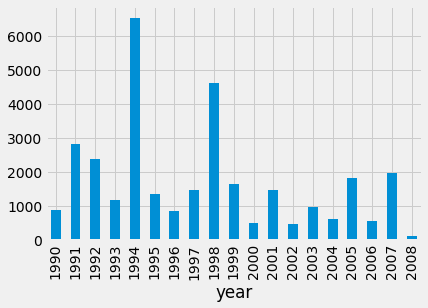

In [1640]:
sj.groupby(['year']).total_cases.sum().plot(kind='bar')

Most cases were in the year 1994 and the least cases in 2008

In [1641]:
# Checking on  min value of weekof year
print(sj['weekofyear'].min())

1


In [1642]:
# checking  min and max value of week start dates 
sj['weekofyear'].max()

53

In [1643]:
sj['ndvi_nw'].min()

-0.4561

Negative values of NDVI (values approaching -1) correspond to water. Valu`es close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

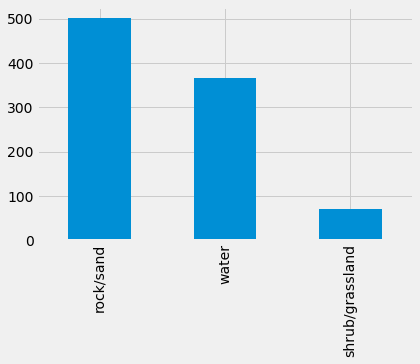

In [1644]:
#Vegetation 
#getting total vegetation
sj['ndvi_all_directions']=(sj['ndvi_ne']+sj['ndvi_nw']+sj['ndvi_se']+sj['ndvi_sw'])/4

# 
def get_ndvi_category(x):
    x=float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x <0.2: return 'rock/sand'
    if x >=0.2 and x<0.5 : return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return "other"

sj['ndvi_desc'] = sj.ndvi_all_directions.apply(get_ndvi_category)  

#calculating the value counts for type of vegetation.
sj['ndvi_desc'].value_counts().plot(kind='bar')

Most parts of this city are rocky and the rest is mostly water and a small part has shrubs.This was an expectation since San Juan is an Island in the carribean.

**Iquitos**.

In [1645]:
iq.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

Total Cases

0
116


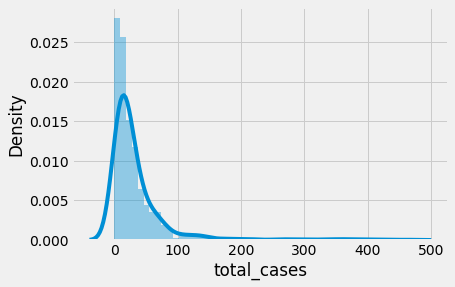

In [1646]:
# getting min and max value of total cases
print(iq['total_cases'].min())

# max value of total cases
print(iq['total_cases'].max())

#Plotting the distribution of total cases
sns.distplot(sj.total_cases)
plt.show()

Same as Iquitos, most entries are below 50 and reduces towards 100, above 100 are rare.

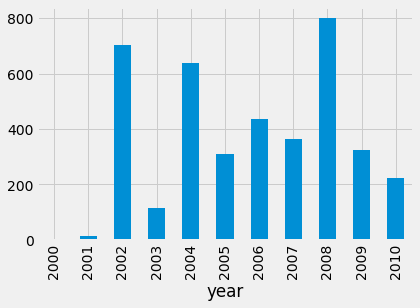

In [1647]:
iq.groupby(['year']).total_cases.sum().plot(kind='bar')

The year that recorded the highest cases was 2008, though 2002 and 2004 had relatively high number of cases.

The least affected with  zero cases year was 2000

Weeks of year.

In [1648]:
iq['weekofyear'].max()

53

In [1649]:
iq['weekofyear'].unique()

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       52, 53])

Vegetation

In [1650]:
iq['ndvi_ne'].min()

0.06172857

Negative values of NDVI (values approaching -1) correspond to water. Valu`es close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

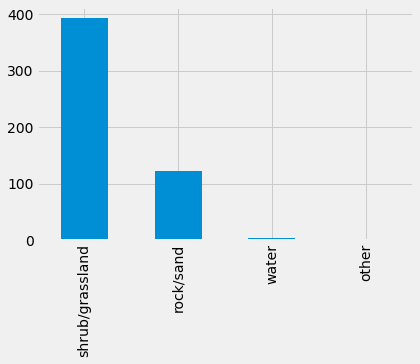

In [1651]:
# getting total vegetation
iq['ndvi_all_directions']=(iq['ndvi_ne']+iq['ndvi_nw']+iq['ndvi_se']+iq['ndvi_sw'])/4

# categorizing vegetation into different specific types
def get_ndvi_category(x):
    x=float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x <0.2: return 'rock/sand'
    if x >=0.2 and x<0.5 : return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return "other"
iq['ndvi_desc'] =iq.ndvi_all_directions.apply(get_ndvi_category)

# calculating frequency of thetype ofvegetation
iq['ndvi_desc'].value_counts().plot(kind='bar')

Most areas in iquitos are shrub/grassland.
observations
The worst year insan juan was 1994 while in iquitos it was 2008
In san juan the year with least cases was 2008 while iquitos peru the year2000 had zero cases
san juan is mostly rocky while iquitos is shrub/grassland.


#### Bivariate Analysis.

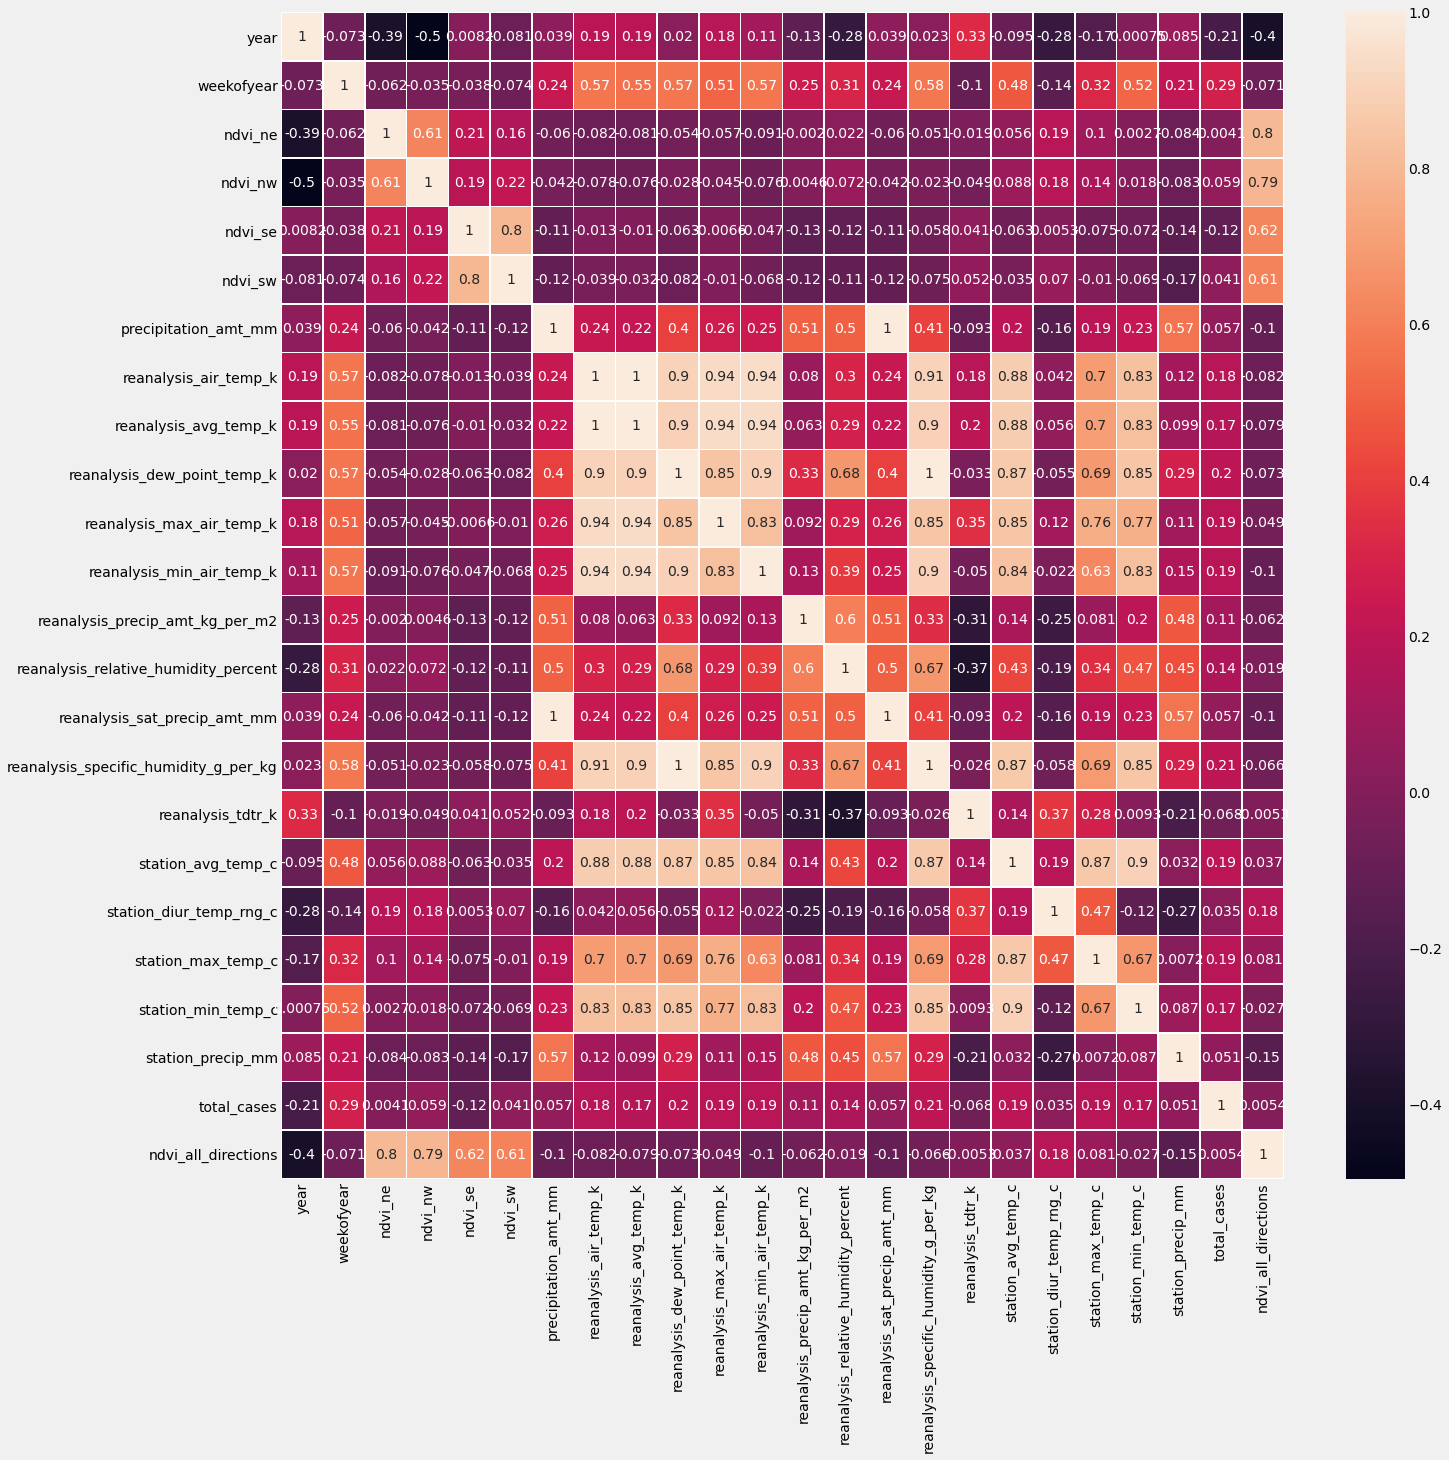

In [1652]:
# San Juan
data_corr = sj.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_corr,annot=True,linewidths=.6, ax=ax)





*  Apparently total number of dengue cases has no correlation with any feature.
Temperature: The temperature variables (reanalysis_air_temp_k to reanalysis_min_air_temp_k) are strongly correlated together in San Juan.





In [1653]:
sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'ndvi_all_directions', 'ndvi_desc'],
      dtype='object')

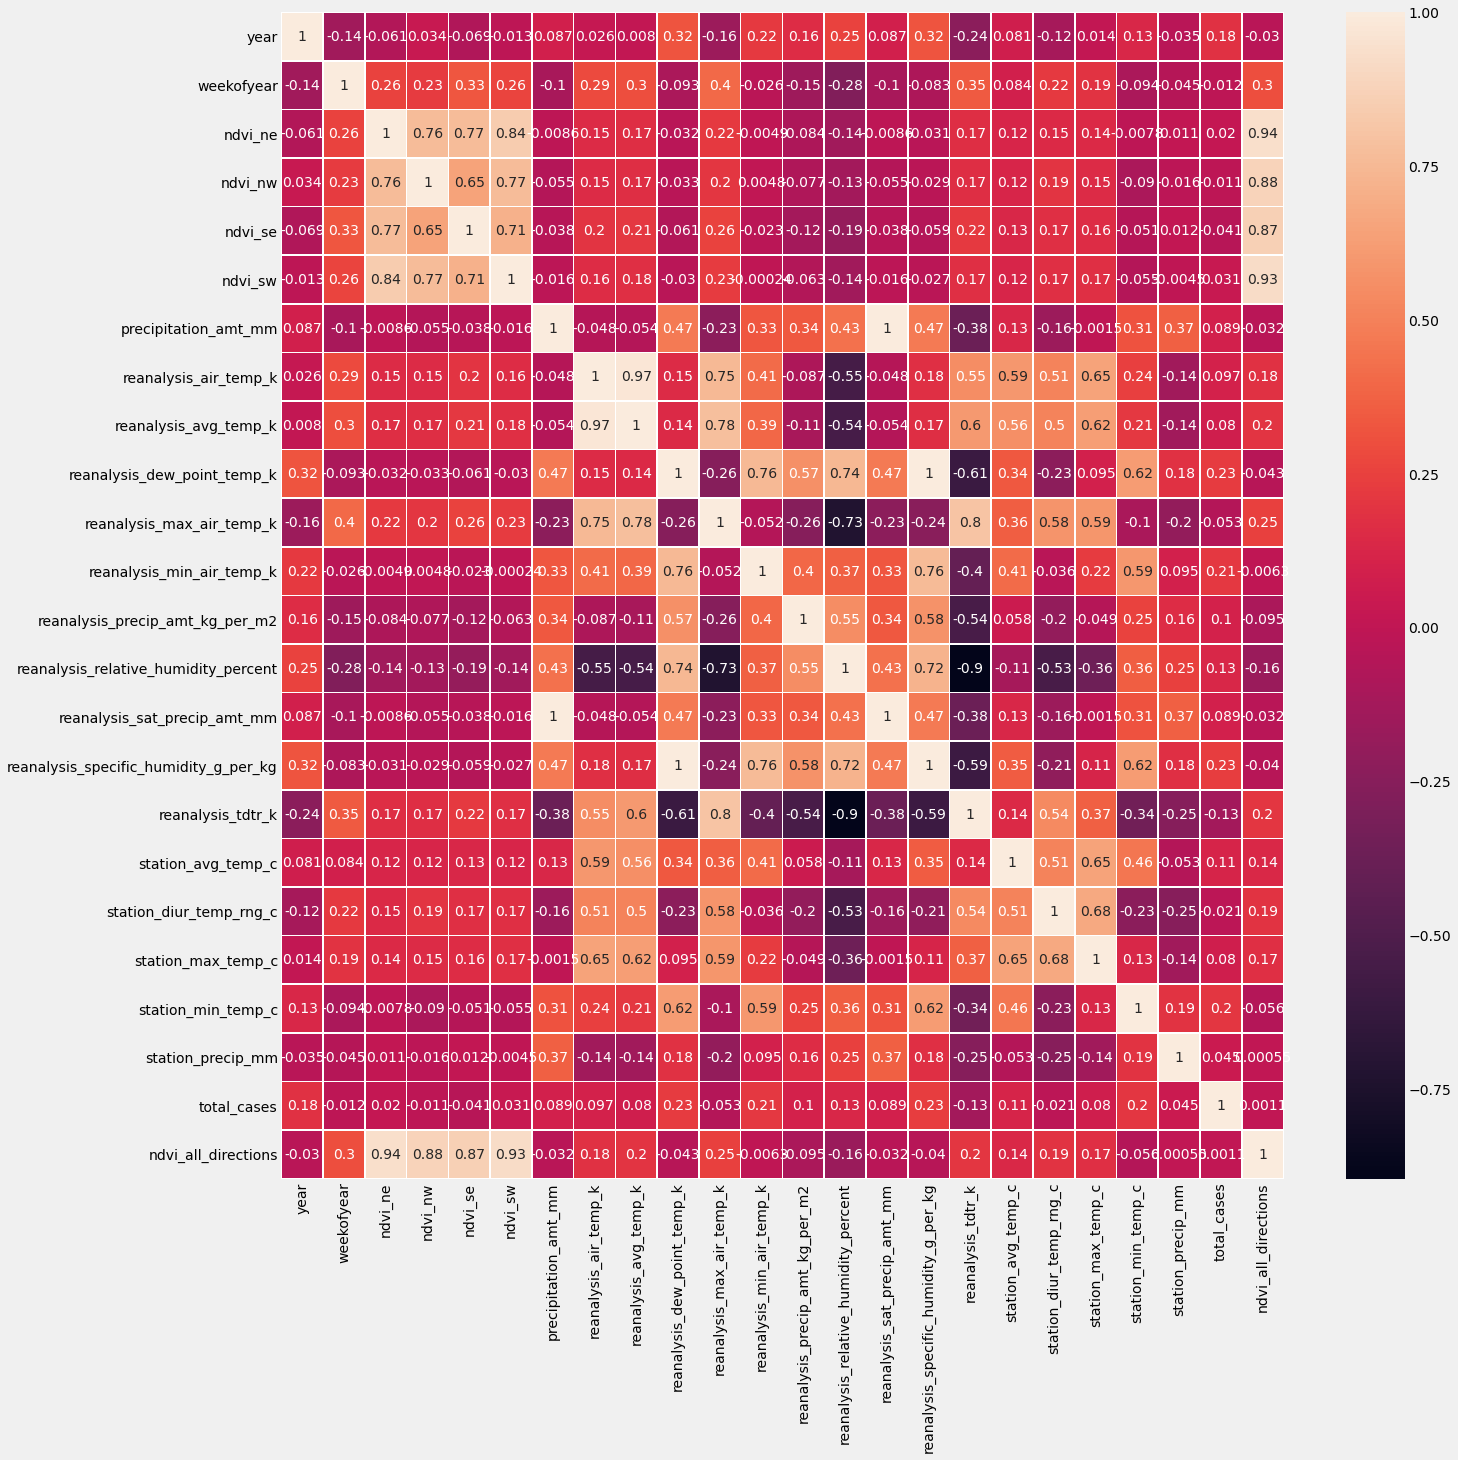

In [1654]:
#Iquitos
data_corr2 = iq.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(data_corr2,annot=True,linewidths=.6, ax=ax)

*   There is a correlation in NVDI for north east and south east in Iquitos.
*   Similarly withthe total number of cases at Iquitos there is no correlation.



In [1655]:
# create mean NVDI for each week for each city
sj['nvdi_mean'] = sj[sj.columns[3:7]].mean(axis = 1)
iq['nvdi_mean'] = iq[iq.columns[3:7]].mean(axis = 1)

In [1656]:
sj.head(5)

city  year  weekofyear  ... ndvi_all_directions        ndvi_desc  nvdi_mean
0   sj  1990          18  ...            0.150606        rock/sand   0.141603
1   sj  1990          19  ...            0.157479        rock/sand   0.158144
2   sj  1990          20  ...            0.133315        rock/sand   0.120806
3   sj  1990          21  ...            0.209286  shrub/grassland   0.200419
4   sj  1990          22  ...            0.239235  shrub/grassland   0.236533

[5 rows x 28 columns]

Span of years.

In [1657]:
sj['week_start_date'].min(),sj['week_start_date'].max()

(Timestamp('1990-04-30 00:00:00'), Timestamp('2008-04-22 00:00:00'))

Precipitation in amounts over the years

In [1658]:
sj1 = sj.groupby('week_start_date')['precipitation_amt_mm'].sum().reset_index()
sj1 = sj1.set_index('week_start_date')
sj1.index

DatetimeIndex(['1990-04-30', '1990-05-07', '1990-05-14', '1990-05-21',
               '1990-05-28', '1990-06-04', '1990-06-11', '1990-06-18',
               '1990-06-25', '1990-07-02',
               ...
               '2008-02-19', '2008-02-26', '2008-03-04', '2008-03-11',
               '2008-03-18', '2008-03-25', '2008-04-01', '2008-04-08',
               '2008-04-15', '2008-04-22'],
              dtype='datetime64[ns]', name='week_start_date', length=936, freq=None)

In [1659]:
d =sj1['precipitation_amt_mm'].resample('M').mean()
d['2006':]

week_start_date
2006-01-31    45.4900
2006-02-28     7.4875
2006-03-31    12.0200
2006-04-30    81.5060
2006-05-31    43.5525
2006-06-30    28.0900
2006-07-31    53.3720
2006-08-31    57.8525
2006-09-30    42.5200
2006-10-31    48.7620
2006-11-30    25.2050
2006-12-31    19.0800
2007-01-31    12.6820
2007-02-28     0.0000
2007-03-31    10.7100
2007-04-30    53.3000
2007-05-31    17.1325
2007-06-30    52.5175
2007-07-31    29.4100
2007-08-31    51.8050
2007-09-30    51.4750
2007-10-31    70.8700
2007-11-30    36.6425
2007-12-31    27.8150
2008-01-31    23.6920
2008-02-29     0.0000
2008-03-31     6.7975
2008-04-30     5.1950
Freq: M, Name: precipitation_amt_mm, dtype: float64

Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data. This is a very important technique in the field of analytics.
Most commonly used time series frequency are –
W : weekly frequency
M : month end frequency
SM : semi-month end frequency (15th and end of month)
Q : quarter end frequency

Visualize precipitation amounts in San Juan

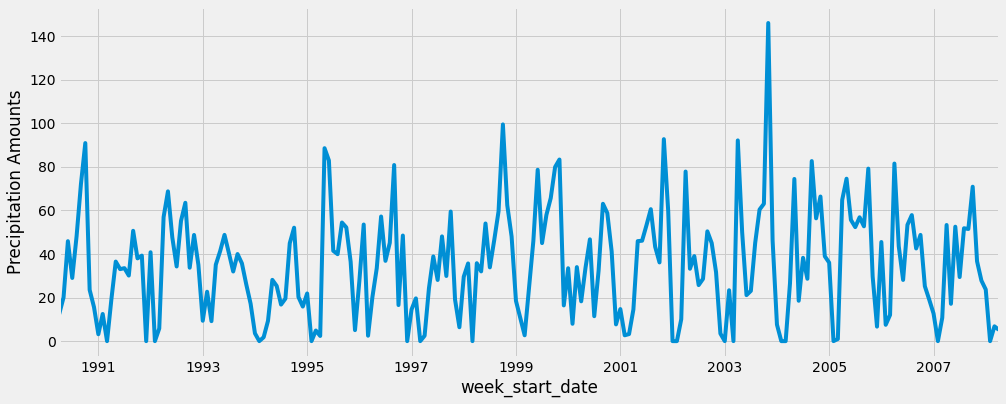

In [1660]:
d.plot(figsize=(15, 6))
plt.ylabel("Precipitation Amounts")
plt.show()

Precipitation amounts have been constant over the years.

In [1661]:
sj_new = sj.copy()
iq_new = iq.copy()

##### Climatic Conditions(Weather)

To visualize weather conditions we will need to standardize them to do away with the units.

In [1662]:
from sklearn.preprocessing import StandardScaler

#Standardizing San Juan Features.
scaler = StandardScaler()
features = sj_new.columns[8:24]
scaled_sj = scaler.fit_transform(sj_new[features])
scaled_sj = pd.DataFrame(scaled_sj, columns = features, index=sj_new.index)
scaled_sj['weekofyear'] = sj_new['weekofyear']

#Standardizing Iquitos features.
features2 = iq_new.columns[8:24]
scaled_iq = scaler.fit_transform(iq_new[features])
scaled_iq = pd.DataFrame(scaled_iq, columns = features, index=iq_new.index)
scaled_iq['weekofyear'] = iq_new['weekofyear']
scaled_iq.head()

precipitation_amt_mm  reanalysis_air_temp_k  ...  station_precip_mm  weekofyear
936             -1.108024              -0.965058  ...          -0.931223          26
937             -0.106517              -1.055384  ...          -0.095081          27
938             -0.251337              -1.242140  ...          -0.373265          28
939             -1.671656              -2.146624  ...          -0.502025          29
940             -0.045345              -1.227492  ...          -0.915327          30

[5 rows x 17 columns]

Since weather conditions are best described during time of the year, We will plot our weather conditions against mweek of the year.

##### **San Juan Weather Conditions**

###### 1.Precipitation

Text(0.5, 0, 'Week of Year')

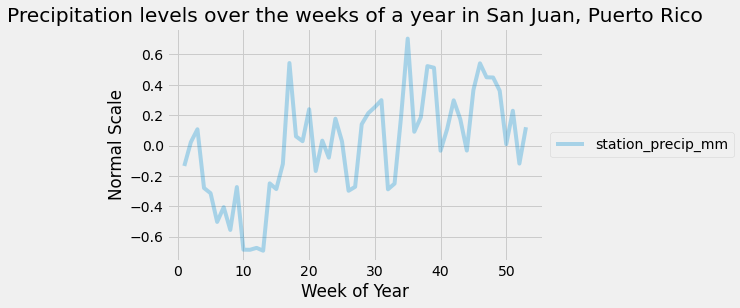

In [1663]:
#selecting columns
precipitation_sj = scaled_sj.iloc[:,[15,16]]
precipitation_sj.head()

precipitation_sj.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Precipitation levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

###### 2.Temperatures in San Juan Throughout the year

Text(0.5, 0, 'Week of Year')

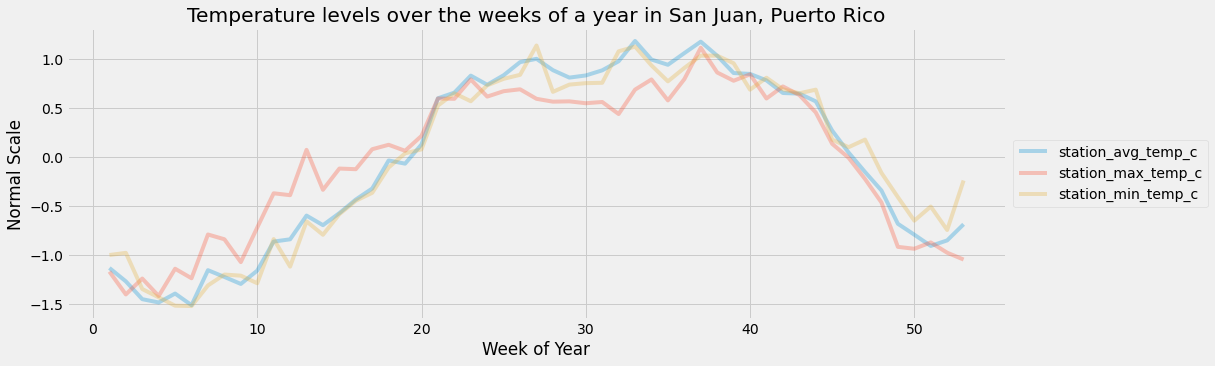

In [1664]:
#selecting columns
temp_sj = scaled_sj.iloc[:,[11,13,14,16]]

plt.subplots(figsize=(15, 5))

for i in (temp_sj.columns[0:3]):
  temp_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperature levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Temperatures are lower around the 25th week and rise from week 30 all the way to week 40.

###### 3.Humidity.

Text(0.5, 0, 'Week of Year')

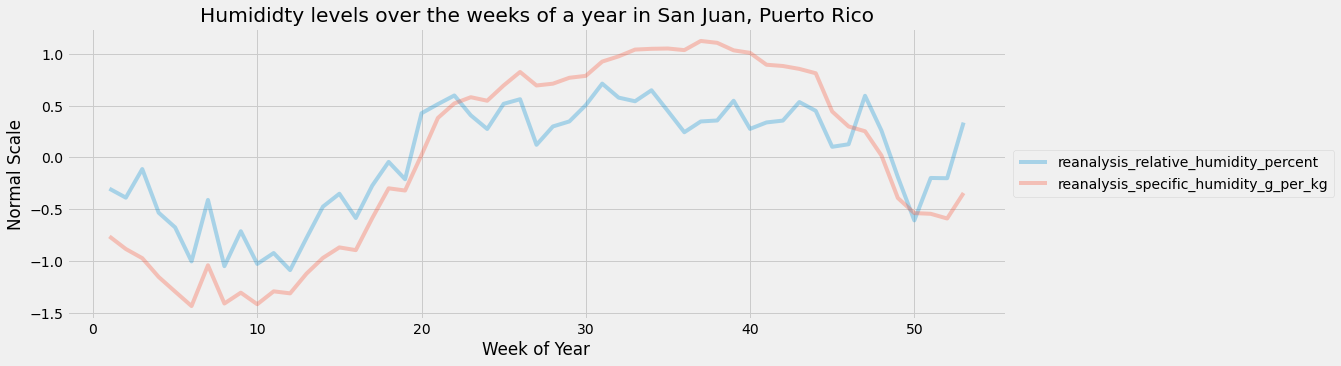

In [1665]:
#selecting columns
humidity_sj = scaled_sj.iloc[:,[7,9,16]]

plt.subplots(figsize=(15, 5))

for i in (humidity_sj.columns[0:2]):
  humidity_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Humididty levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humidity is high from week 20 all the way to week 40.

###### 4.NVDI-Vegetation cover

Finding the mean of vegetation for each week in the four quadrants.(NE,NW,SE,SW)

Since the four features represent the different parts of the city(San Juan) we can as well get an average of vegetation cover per week.

In [1666]:
# creating the  mean NVDI for each week for each city
sj_new['nvdi_mean'] = sj_new[sj_new.columns[4:8]].mean(axis = 1)
iq_new['nvdi_mean'] = iq_new[iq_new.columns[4:8]].mean(axis = 1)

Mean of NVDI over the weeks.

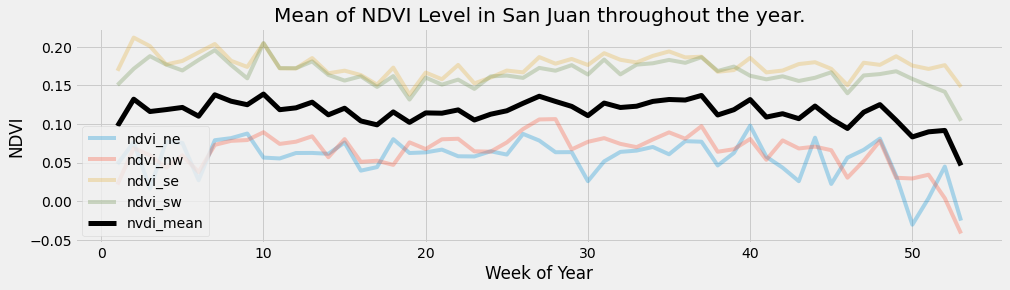

In [1667]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
sj_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan throughout the year.')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


The NVDI scores in SW and SE are lower than the scores of NW and NE but then the average remains constant.There is a decrease around the last months of the years though.

**Mean of NVDI over the years In San Juan Purto Rico.**

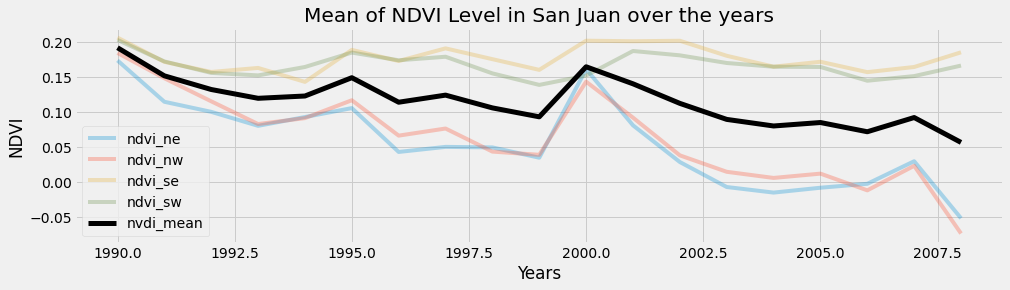

In [1668]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('year')[name].mean().plot(alpha = .3)
sj_new.groupby('year')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan over the years')
plt.xlabel('Years')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


On average te number of dengue cases rise from week 25(June) till week 40(September) when it's at the peek then go down significantly over the weeks and is lowest between week 10(March) and week 20(May).

#### **Iquitos Weather Conditions**.

In [1669]:
scaled_iq.columns

Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'weekofyear'],
      dtype='object')

###### 1.Precipitation.

Text(0.5, 0, 'Week of Year')

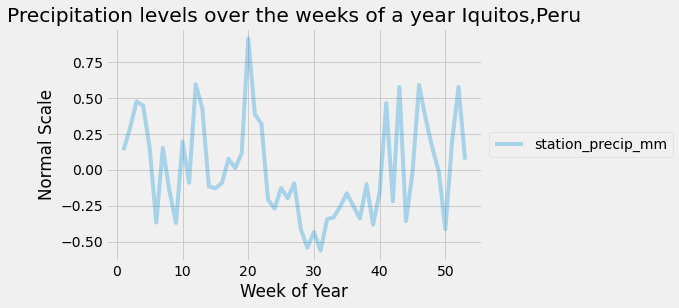

In [1670]:
#selecting columns
precipitation_iq = scaled_iq.iloc[:,[15,16]]

precipitation_iq.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Precipitation levels over the weeks of a year Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humidity is a measure of the amount of water vapour being held in the air. Water vapour is a gas. Precipitation is when the gas turns to liquid or solid and forms rain, snow, hail, mist, fog, frost, dew etc

###### 2.Temperatures in Iquitos,Peru throughout the year.

Text(0.5, 0, 'Week of Year')

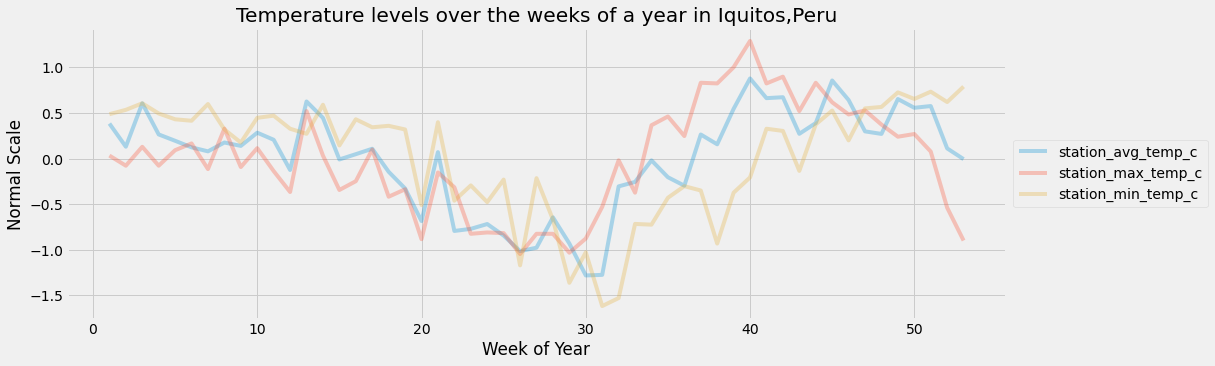

In [1671]:
#selecting columns
temp_iq = scaled_iq.iloc[:,[11,13,14,16]]

plt.subplots(figsize=(15, 5))

for i in (temp_iq.columns[0:3]):
  temp_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperature levels over the weeks of a year in Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

In Iquitos, Temeratures are lower at week 20 to week 30 then there is a rise at week 30 until week 40.

###### 3.Humidity Levels in Iquitos,Peru.

Text(0.5, 0, 'Week of Year')

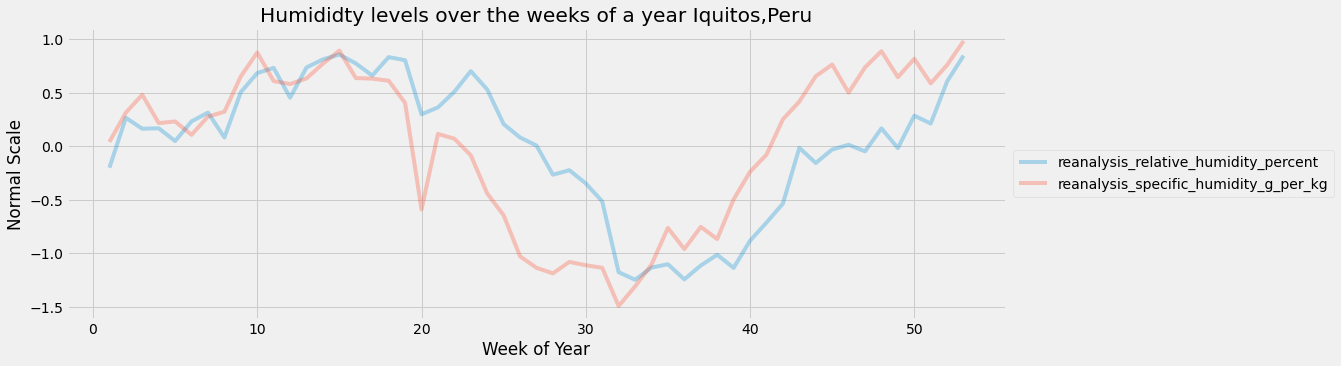

In [1672]:
#selecting columns
humidity_iq = scaled_iq.iloc[:,[7,9,16]]

plt.subplots(figsize=(15, 5))

for i in (humidity_iq.columns[0:2]):
  humidity_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Humididty levels over the weeks of a year Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humididty levela go low as temperature gets rising at week 30 there about.

###### 4.NVDI-Vegetation cover - Iquitos,Peru.


Mean of NVDI over the weeks in Iquitos,Peru.


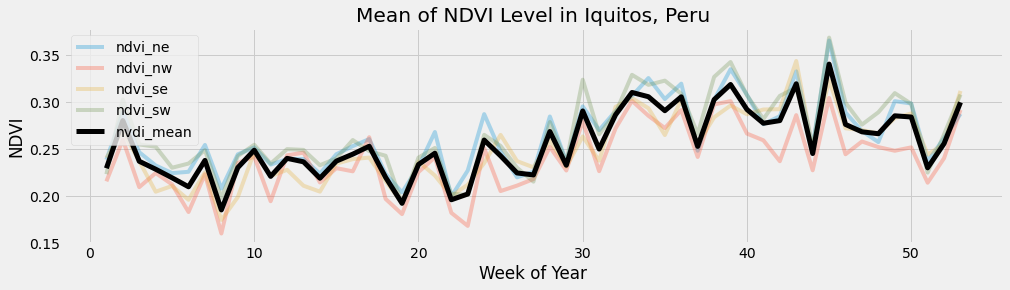

In [1673]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in iq_new.columns[4:8]:
  iq_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
iq_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in Iquitos, Peru')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


Iquitos show a consistent NVDI score throughout though there is an rise around week 25 to 45 there about.

Mean of NVDI over the years in Iquitos,Peru.

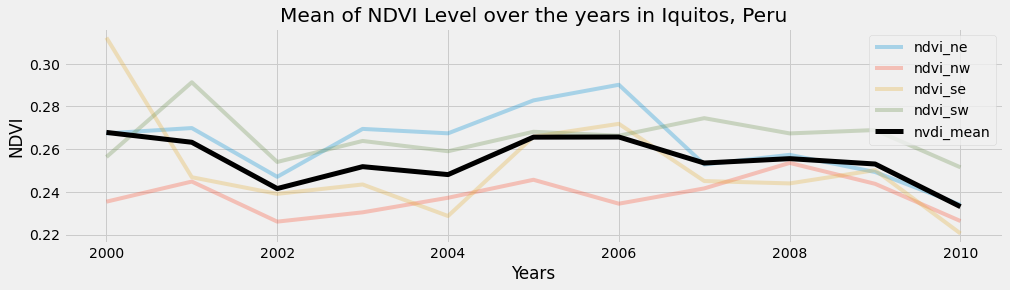

In [1674]:
# plot week by week average vegetation for Iquitos.
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in iq_new.columns[4:8]:
  iq_new.groupby('year')[name].mean().plot(alpha = .3)
iq_new.groupby('year')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level over the years in Iquitos, Peru')
plt.xlabel('Years')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.


###### Distribution of Total Cases Over the years.

Text(0.5, 1.0, 'Distribution of Total Dengue cases over the years in Iquitos')

<Figure size 432x288 with 0 Axes>

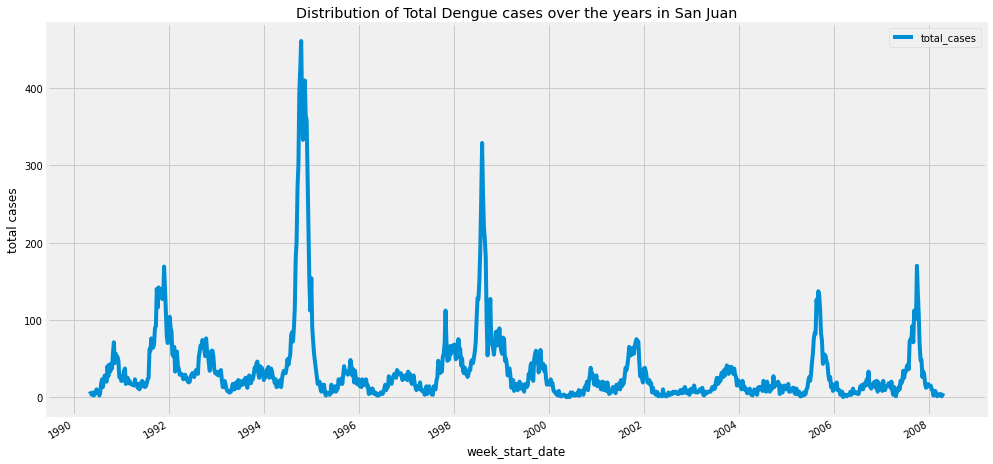

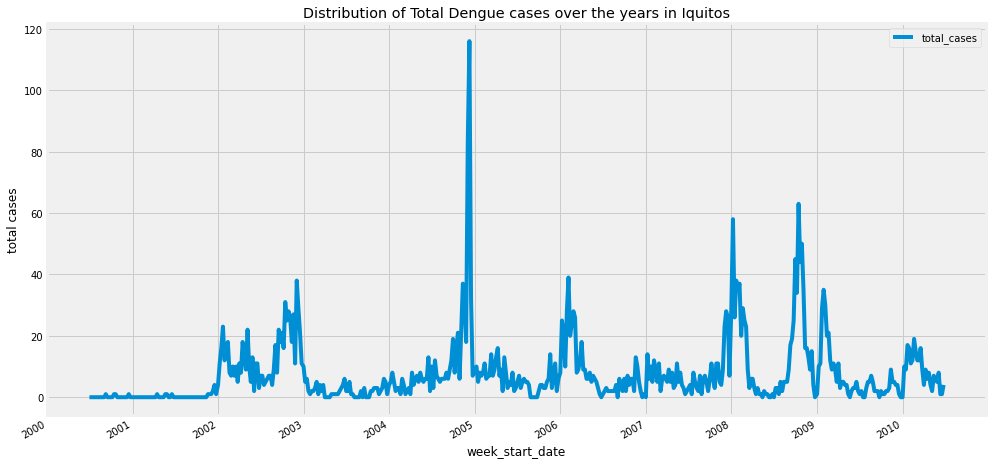

In [1675]:
%matplotlib inline

plt.figure()
ax = sj[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax1 = iq[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax.set_ylabel('total cases')
ax1.set_ylabel('total cases')#Iquitos

ax.set_title('Distribution of Total Dengue cases over the years in San Juan')
ax1.set_title('Distribution of Total Dengue cases over the years in Iquitos')

**San Juan**

From June 1994 to May 1995, a very high number of dengue cases was recorded in San Juan, Puerto Rico. This epidemic produced the largest number of hospitalizations.

Also at the onset of 1999 there was relatively high reports of cases of people that were infected with Dengue.


**Iquitos.**

There was a high recording of dengue cases in Iquitos at the end of 2004 approaching 2005 and later rose between 2008 and 2009.[link text](https://www.researchgate.net/figure/Dengue-epidemics-overlaid-to-illustrate-shifting-of-peak-incidence-The-epidemics-are_fig10_264009350)

We could refer to this outliers as outbreaks.


###### Total Cases over the weeks.
1. San Juan, Puerto Rico.

Text(0.5, 0, 'Week of Year')

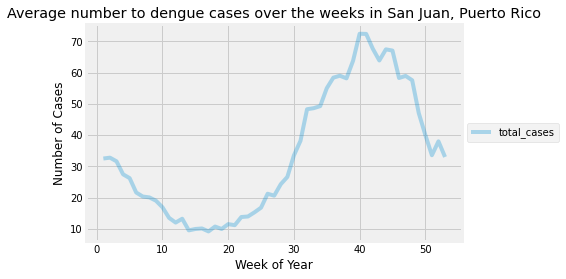

In [1676]:
df = scaled_sj.copy()
df['total_cases'] = sj['total_cases']

#selecting columns
df1 = df[['total_cases','weekofyear']]

df1.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in San Juan, Puerto Rico')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')

In San Juan, Puerto Rico, the average number of cases reported per week is normally lowfrom beginning of week 10(March) to week 20(May) then rises after that and is highest at week 40 which is around October before a gradual decrease again.

2. Iquitos

Text(0.5, 0, 'Week of Year')

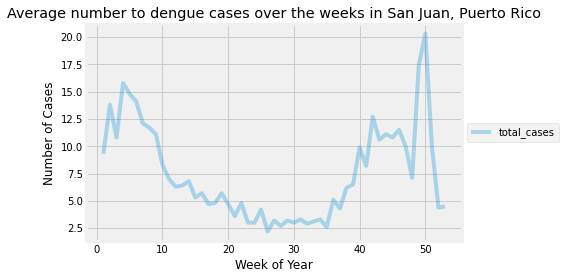

In [1677]:
df11 = scaled_iq.copy()
df11['total_cases'] = iq['total_cases']

#selecting columns
df111 = df11[['total_cases','weekofyear']]

df111.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in San Juan, Puerto Rico')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')

In Iquitos, dengue cases are rise from week 35 and is highest at week 50(December) then drops for a span of two weeks and rises again in January.
Cases are low in the middle of the year.

Findings;
*   List item
*   List item



### **Trends of Climatic Conditions and Total Number of Cases**

San Juan

In [1678]:
sj_new.head()

city  year  weekofyear  ... ndvi_all_directions        ndvi_desc  nvdi_mean
0   sj  1990          18  ...            0.150606        rock/sand   0.150606
1   sj  1990          19  ...            0.157479        rock/sand   0.157479
2   sj  1990          20  ...            0.133315        rock/sand   0.133315
3   sj  1990          21  ...            0.209286  shrub/grassland   0.209286
4   sj  1990          22  ...            0.239235  shrub/grassland   0.239235

[5 rows x 28 columns]

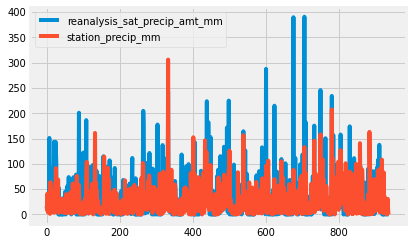

In [1679]:
#compare both precipitation columns
sj[['reanalysis_sat_precip_amt_mm','station_precip_mm']].plot()

Reanalysis datasets are created by assimilating ("inputting") climate observations using the same climate model throughout the entire reanalysis period in order to reduce the affects of modeling changes on climate statistics.

In this case reanalysis precipitation is higher than station precipitation(actual recorded data)

### **Decomposing Data** 
This enables us to see trends, seasonality and noise in the data.

In [1680]:
sj.head()

city  year  weekofyear  ... ndvi_all_directions        ndvi_desc  nvdi_mean
0   sj  1990          18  ...            0.150606        rock/sand   0.141603
1   sj  1990          19  ...            0.157479        rock/sand   0.158144
2   sj  1990          20  ...            0.133315        rock/sand   0.120806
3   sj  1990          21  ...            0.209286  shrub/grassland   0.200419
4   sj  1990          22  ...            0.239235  shrub/grassland   0.236533

[5 rows x 28 columns]

In [1681]:
from pylab import rcParams

dec = sj[['week_start_date','total_cases']]
dec.set_index('week_start_date',inplace=True)
dec.head()

total_cases
week_start_date             
1990-04-30                 4
1990-05-07                 5
1990-05-14                 4
1990-05-21                 3
1990-05-28                 6

No handles with labels found to put in legend.


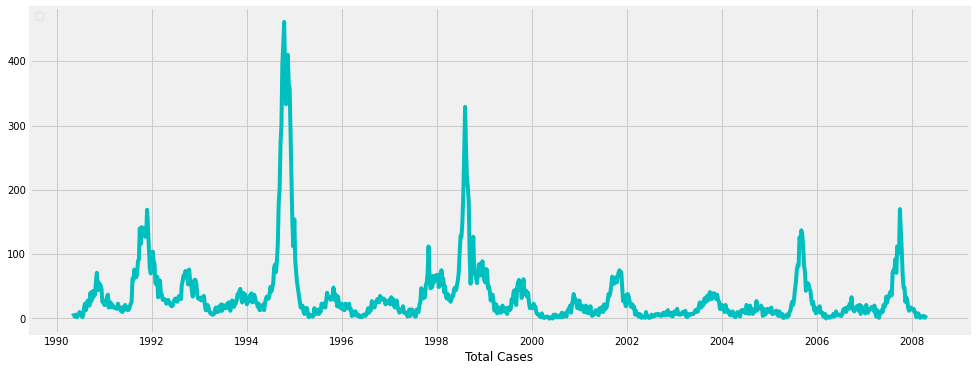

In [1682]:
plt.figure(figsize=(15,6))
plt.plot(dec.index, dec, color='c', label=None)
plt.xlabel('Years')
plt.xlabel('Total Cases')
plt.legend(loc=2)
plt.show()

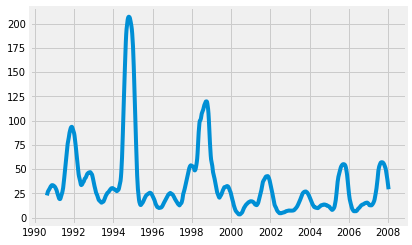

In [1683]:
#Decomposing to three components 
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

#Use an additive model
result = seasonal_decompose(dec, model='additive',freq=30)

plt.plot(result.trend)

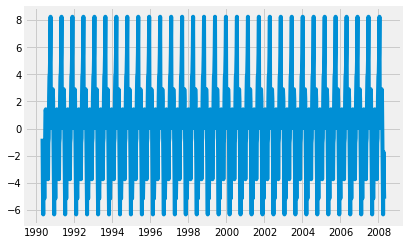

In [1684]:
plt.plot(result.seasonal)

the seasonal one repeats at regular intervals of time.

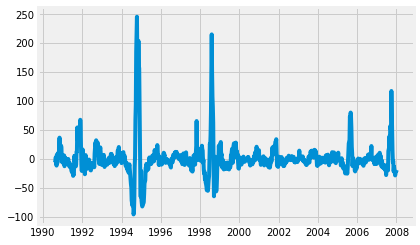

In [1685]:
plt.plot(result.resid)

The plot above clearly shows shat the total number of dengue cases is unstable along with its obvious seasonality. 

### FEATURE SELECTION.

Text(0.5, 1.0, 'Correlation with total_cases in "sj"')

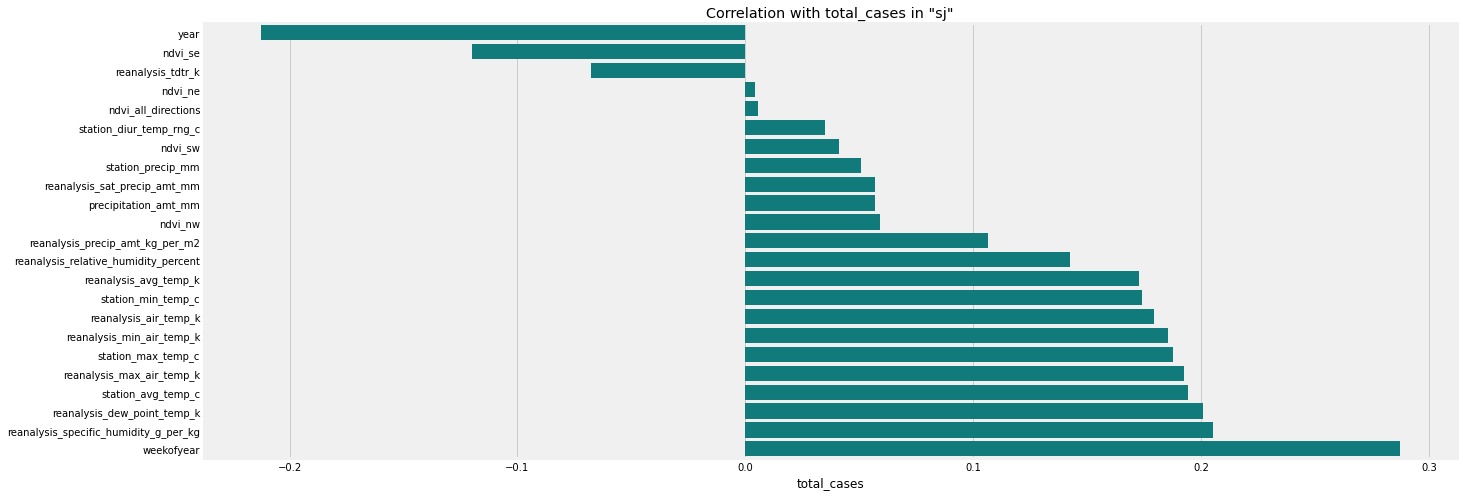

In [1686]:
sorted_features = data_corr.sort_values(by='total_cases', axis=0).drop('total_cases')
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=sorted_features.total_cases, y=sorted_features.index, color="darkcyan")
ax.set_title('Correlation with total_cases in "sj"')

Removing the highly correlated features.

In [1687]:
sj_no_corr = sj.drop(['precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
                      'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','ndvi_all_directions','ndvi_desc','city','nvdi_mean'],axis=1)
sj_no_corr.head()

year  weekofyear  ... station_precip_mm  total_cases
0  1990          18  ...              16.0            4
1  1990          19  ...               8.6            5
2  1990          20  ...              41.4            4
3  1990          21  ...               4.0            3
4  1990          22  ...               5.8            6

[5 rows x 16 columns]

In [1688]:
sj_no_corr.shape

(936, 16)

In [1689]:
sjtest_no_corr = sj_test.drop(['precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
                      'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','city'],axis=1)
sjtest_no_corr.head()

year  weekofyear  ... station_min_temp_c  station_precip_mm
0  2008          18  ...               21.7               75.2
1  2008          19  ...               22.2               34.3
2  2008          20  ...               22.8                3.0
3  2008          21  ...               24.4                0.3
4  2008          22  ...               23.3               84.1

[5 rows x 15 columns]

In [1690]:
sjtest_no_corr.shape

(260, 15)

In [1691]:
#train
iq_no_corr = iq.drop(['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k','reanalysis_sat_precip_amt_mm','precipitation_amt_mm','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
                  'reanalysis_avg_temp_k','ndvi_desc','ndvi_all_directions','city','nvdi_mean'],axis=1)
iq_no_corr.head()

year  weekofyear  ... station_precip_mm  total_cases
936  2000          26  ...               3.0            0
937  2000          27  ...              55.6            0
938  2000          28  ...              38.1            0
939  2000          29  ...              30.0            0
940  2000          30  ...               4.0            0

[5 rows x 14 columns]

In [1692]:
iq_no_corr.shape

(520, 14)

In [1693]:
#test
iqtest_no_corr = iq_test.drop(['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k','reanalysis_sat_precip_amt_mm','precipitation_amt_mm','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
                  'reanalysis_avg_temp_k','city'],axis=1)
iqtest_no_corr.head()

year  weekofyear  ... station_min_temp_c  station_precip_mm
260  2010          26  ...               21.5               11.2
261  2010          27  ...               21.2                8.9
262  2010          28  ...               21.6               22.6
263  2010          29  ...               14.2                4.8
264  2010          30  ...               16.9                3.0

[5 rows x 13 columns]

In [1694]:
iqtest_no_corr.shape

(156, 13)

In [1695]:
sj_no_corr.head()

year  weekofyear  ... station_precip_mm  total_cases
0  1990          18  ...              16.0            4
1  1990          19  ...               8.6            5
2  1990          20  ...              41.4            4
3  1990          21  ...               4.0            3
4  1990          22  ...               5.8            6

[5 rows x 16 columns]

In [1696]:
sj_no_corr1 = sj_no_corr.drop(['week_start_date'],1)
sj_no_corr1.head()

year  weekofyear  ...  station_precip_mm  total_cases
0  1990          18  ...               16.0            4
1  1990          19  ...                8.6            5
2  1990          20  ...               41.4            4
3  1990          21  ...                4.0            3
4  1990          22  ...                5.8            6

[5 rows x 15 columns]

[0.23855053 0.21273748 0.01604607 0.01336118 0.20405123 0.12283172
 0.02267452 0.0196088  0.02544026 0.04463282 0.02164688 0.02956033
 0.0092861  0.01957208]


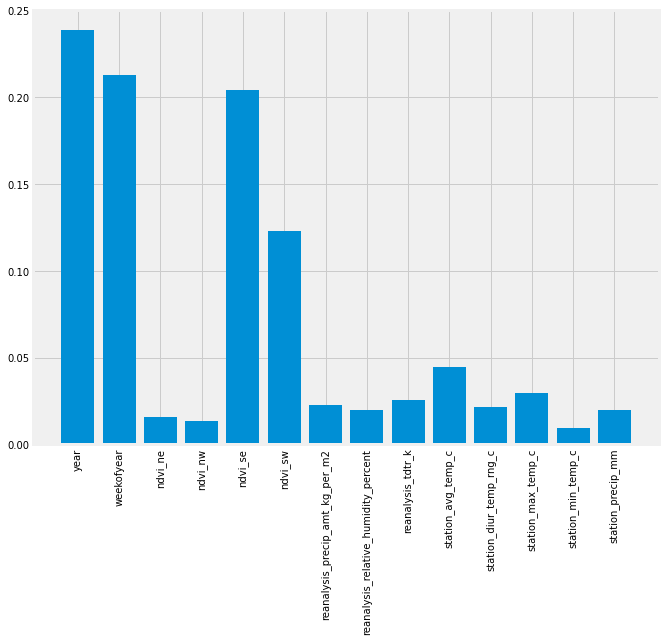

In [1697]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(10,8)) # set the size that you'd like (width, height)

# load data
array = sj_no_corr1.values
# split into input and output
X = sj_no_corr1.drop('total_cases',1)
y = sj_no_corr1['total_cases']
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = sj_no_corr1.columns.values[0:-1]
scores = [i for i in range(len(names))]
pyplot.bar(scores, model.feature_importances_)
pyplot.xticks(scores, names)
plt.xticks(rotation=90)
pyplot.show()

In [1698]:
# Get numerical feature importances
importance = model.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importance)]

# printing feature inportances
print(feature_importances) 
print()

# Sorting the values in descending order, since we want to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];

[('year', 0.24), ('weekofyear', 0.21), ('ndvi_ne', 0.02), ('ndvi_nw', 0.01), ('ndvi_se', 0.2), ('ndvi_sw', 0.12), ('reanalysis_precip_amt_kg_per_m2', 0.02), ('reanalysis_relative_humidity_percent', 0.02), ('reanalysis_tdtr_k', 0.03), ('station_avg_temp_c', 0.04), ('station_diur_temp_rng_c', 0.02), ('station_max_temp_c', 0.03), ('station_min_temp_c', 0.01), ('station_precip_mm', 0.02)]

Variable: year                  Importance: 0.24
Variable: weekofyear            Importance: 0.21
Variable: ndvi_se               Importance: 0.2
Variable: ndvi_sw               Importance: 0.12
Variable: station_avg_temp_c    Importance: 0.04
Variable: reanalysis_tdtr_k     Importance: 0.03
Variable: station_max_temp_c    Importance: 0.03
Variable: ndvi_ne               Importance: 0.02
Variable: reanalysis_precip_amt_kg_per_m2 Importance: 0.02
Variable: reanalysis_relative_humidity_percent Importance: 0.02
Variable: station_diur_temp_rng_c Importance: 0.02
Variable: station_precip_mm     Importance: 0.

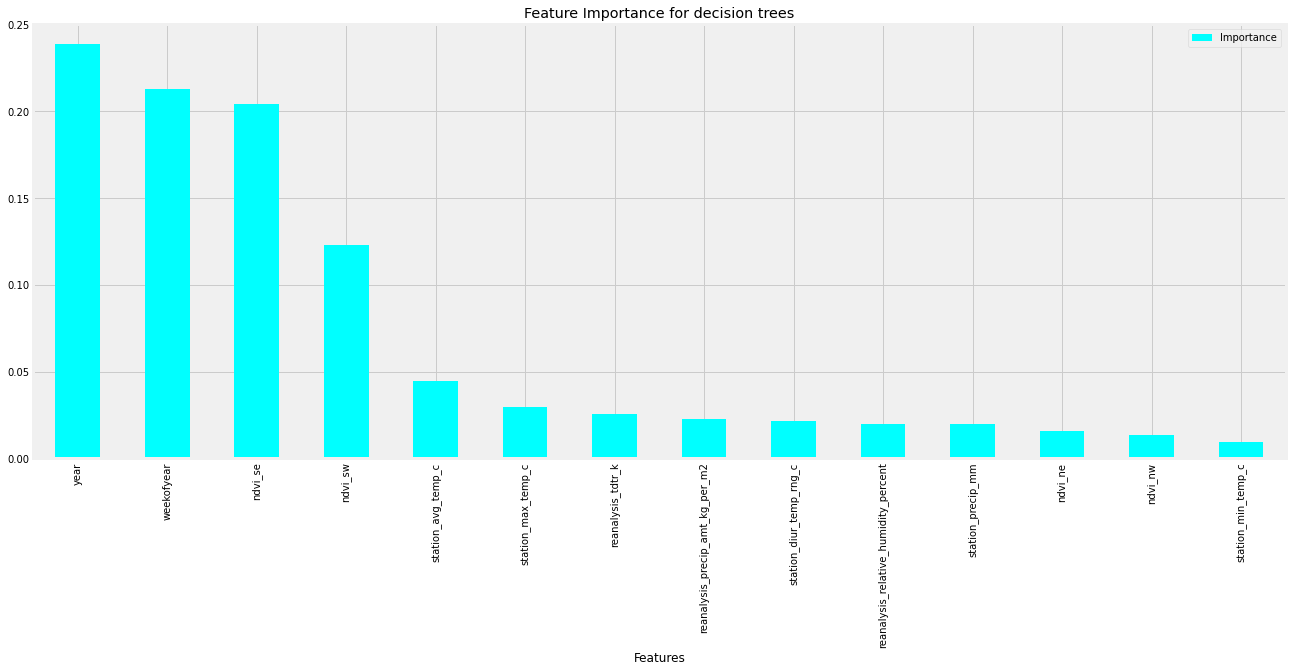

In [1699]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : model.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for decision trees',figsize = (20, 8), color = 'cyan')
plt.show()

In [1700]:
sj_no_corr1.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

**Using RFE.**

Selected Features:
year
weekofyear
ndvi_ne
ndvi_se
ndvi_sw
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_precip_mm


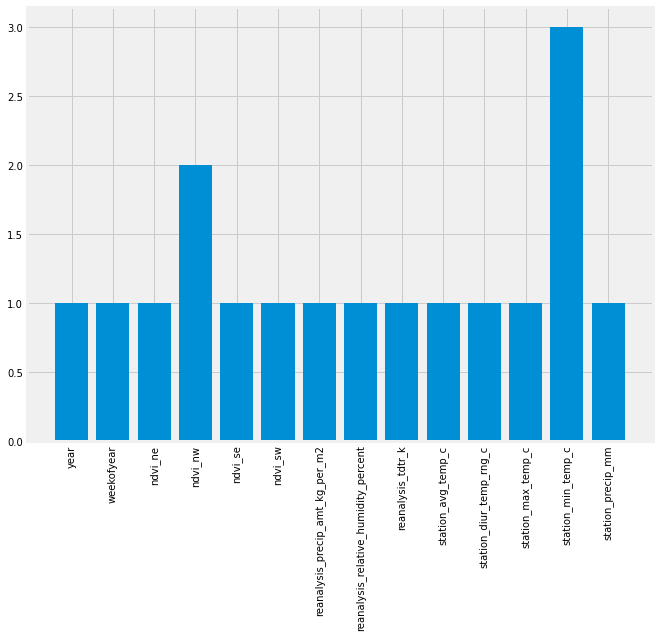

In [1701]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(10,8)) 

# separate into input and output variables
array = sj_no_corr1.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=300, random_state=1), n_features_to_select=12)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = sj_no_corr1.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = sj_no_corr1.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
plt.xticks(rotation=90)
pyplot.show()

### Feature Selection for Iquitos Data.

In [1702]:
iq_no_corr.head(3)

year  weekofyear  ... station_precip_mm  total_cases
936  2000          26  ...               3.0            0
937  2000          27  ...              55.6            0
938  2000          28  ...              38.1            0

[3 rows x 14 columns]

In [1703]:
fs_iq = iq_no_corr.drop(['week_start_date'],1)
fs_iq.head()

year  weekofyear  ...  station_precip_mm  total_cases
936  2000          26  ...                3.0            0
937  2000          27  ...               55.6            0
938  2000          28  ...               38.1            0
939  2000          29  ...               30.0            0
940  2000          30  ...                4.0            0

[5 rows x 13 columns]

[0.23855053 0.21273748 0.01604607 0.01336118 0.20405123 0.12283172
 0.02267452 0.0196088  0.02544026 0.04463282 0.02164688 0.02956033
 0.0092861  0.01957208]


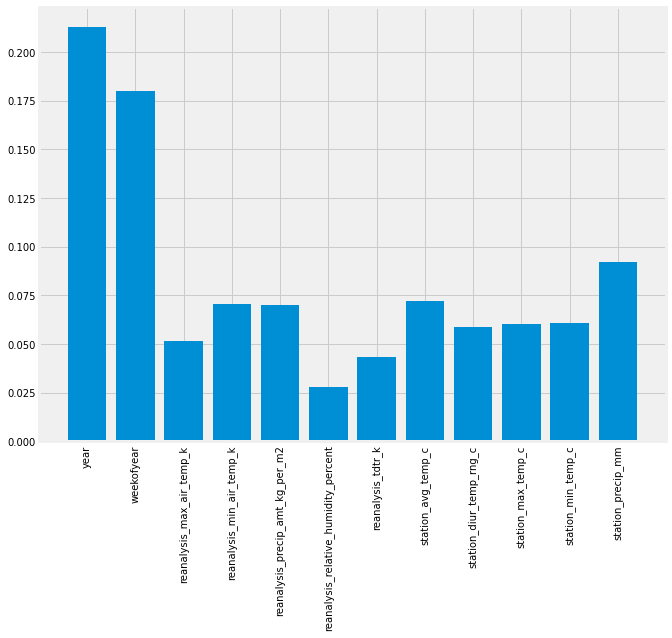

In [1704]:
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(10,8)) # set the size that you'd like (width, height)

# load data
array = fs_iq.values
# split into input and output
X = fs_iq.drop('total_cases',1)
y = fs_iq['total_cases']
# fit random forest model
model_iq = RandomForestRegressor(n_estimators=500, random_state=1)
model_iq.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = fs_iq.columns.values[0:-1]
scores = [i for i in range(len(names))]
pyplot.bar(scores, model_iq.feature_importances_)
pyplot.xticks(scores, names)
plt.xticks(rotation=90)
pyplot.show()

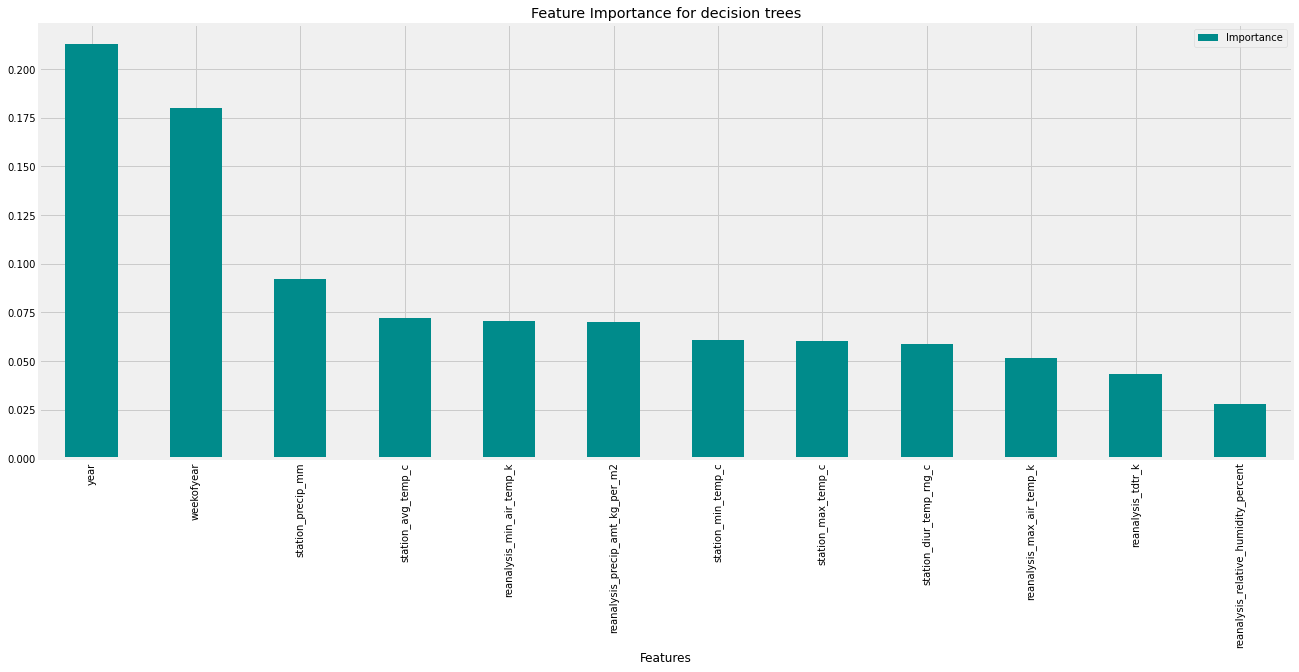

In [1705]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : model_iq.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for decision trees',figsize = (20, 8), color = 'darkcyan')
plt.show()

Selected Features:
year
weekofyear
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm


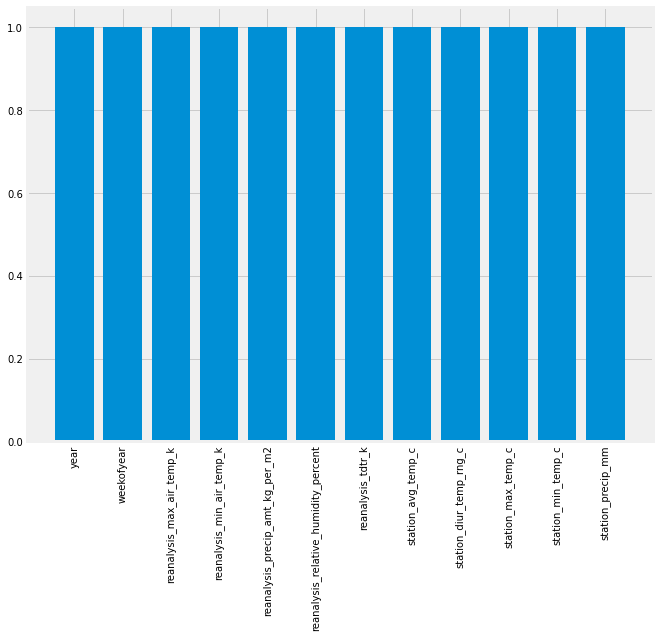

In [1706]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

f, ax = plt.subplots(figsize=(10,8)) 

# separate into input and output variables
array = fs_iq.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=300, random_state=1), n_features_to_select=12)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = fs_iq.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = fs_iq.columns.values[0:-1]
scores = [i for i in range(len(names))]
pyplot.bar(scores, fit.ranking_)
pyplot.xticks(scores, names)
plt.xticks(rotation=90)
pyplot.show()

Final Data.

In [1707]:
sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'ndvi_all_directions', 'ndvi_desc', 'nvdi_mean'],
      dtype='object')

In [1708]:
#San Juan train

final_sj = sj[['year','weekofyear','week_start_date','ndvi_se','ndvi_sw','station_avg_temp_c','station_max_temp_c',
             'reanalysis_tdtr_k','reanalysis_precip_amt_kg_per_m2',
             'station_diur_temp_rng_c','reanalysis_relative_humidity_percent','total_cases']]
final_sj.head()

year  weekofyear  ... reanalysis_relative_humidity_percent  total_cases
0  1990          18  ...                            73.365714            4
1  1990          19  ...                            77.368571            5
2  1990          20  ...                            82.052857            4
3  1990          21  ...                            80.337143            3
4  1990          22  ...                            80.460000            6

[5 rows x 12 columns]

In [1709]:
#san juan test
final_sj_test = sj_test[['year','weekofyear','ndvi_se','ndvi_sw','station_avg_temp_c','station_max_temp_c',
             'reanalysis_tdtr_k','reanalysis_precip_amt_kg_per_m2',
             'station_diur_temp_rng_c','reanalysis_relative_humidity_percent']]
final_sj_test.head()

year  ...  reanalysis_relative_humidity_percent
0  2008  ...                             78.781429
1  2008  ...                             78.230000
2  2008  ...                             78.270000
3  2008  ...                             73.015714
4  2008  ...                             74.084286

[5 rows x 10 columns]

In [1710]:
iq.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'ndvi_all_directions', 'ndvi_desc', 'nvdi_mean'],
      dtype='object')

In [1711]:
#train Iq
final_iq = iq[['year','weekofyear','station_precip_mm','station_avg_temp_c','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','station_min_temp_c',
               'station_max_temp_c','station_diur_temp_rng_c','reanalysis_max_air_temp_k','total_cases']]
final_iq.head()

year  weekofyear  ...  reanalysis_max_air_temp_k  total_cases
936  2000          26  ...                      307.3            0
937  2000          27  ...                      306.6            0
938  2000          28  ...                      304.5            0
939  2000          29  ...                      303.6            0
940  2000          30  ...                      307.0            0

[5 rows x 11 columns]

In [1712]:
#test Iq
final_iq_test = iq_test[['year','weekofyear','station_precip_mm','station_avg_temp_c','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','station_min_temp_c',
               'station_max_temp_c','station_diur_temp_rng_c','reanalysis_max_air_temp_k']]
final_iq_test.head()


year  weekofyear  ...  station_diur_temp_rng_c  reanalysis_max_air_temp_k
260  2010          26  ...                   10.760                      307.9
261  2010          27  ...                    9.625                      307.7
262  2010          28  ...                   10.350                      306.4
263  2010          29  ...                    9.700                      306.4
264  2010          30  ...                   11.850                      308.1

[5 rows x 10 columns]

### Implementation Of Model.

In [1713]:
final_sj.head()
final_sj_test.head()
final_iq.head()
final_iq_test.head()

year  weekofyear  ...  station_diur_temp_rng_c  reanalysis_max_air_temp_k
260  2010          26  ...                   10.760                      307.9
261  2010          27  ...                    9.625                      307.7
262  2010          28  ...                   10.350                      306.4
263  2010          29  ...                    9.700                      306.4
264  2010          30  ...                   11.850                      308.1

[5 rows x 10 columns]

**Checking Stationarity of Time Series.**

*   constant mean
*   constant variance
*   an autocovariance that does not depend on time



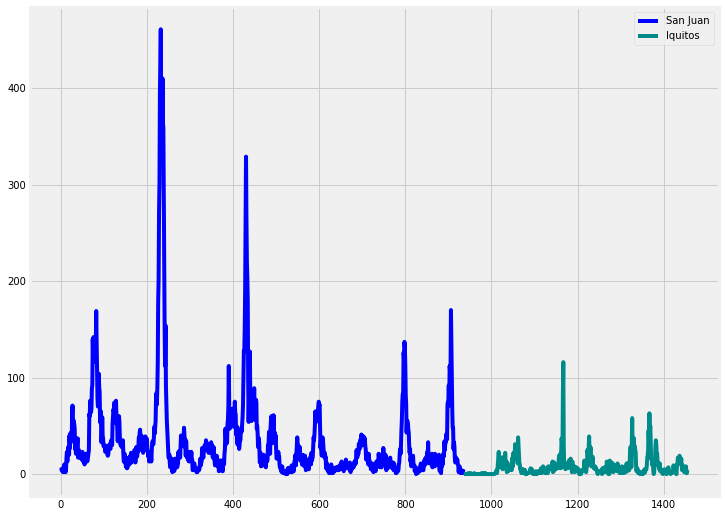

In [1714]:
plt.figure(figsize=(11,9))
plt.plot(sj['total_cases'],label="San Juan", color='b')
plt.plot(iq['total_cases'],label="Iquitos", color='darkcyan')
plt.legend()

In [1715]:
sj.head()

city  year  weekofyear  ... ndvi_all_directions        ndvi_desc  nvdi_mean
0   sj  1990          18  ...            0.150606        rock/sand   0.141603
1   sj  1990          19  ...            0.157479        rock/sand   0.158144
2   sj  1990          20  ...            0.133315        rock/sand   0.120806
3   sj  1990          21  ...            0.209286  shrub/grassland   0.200419
4   sj  1990          22  ...            0.239235  shrub/grassland   0.236533

[5 rows x 28 columns]

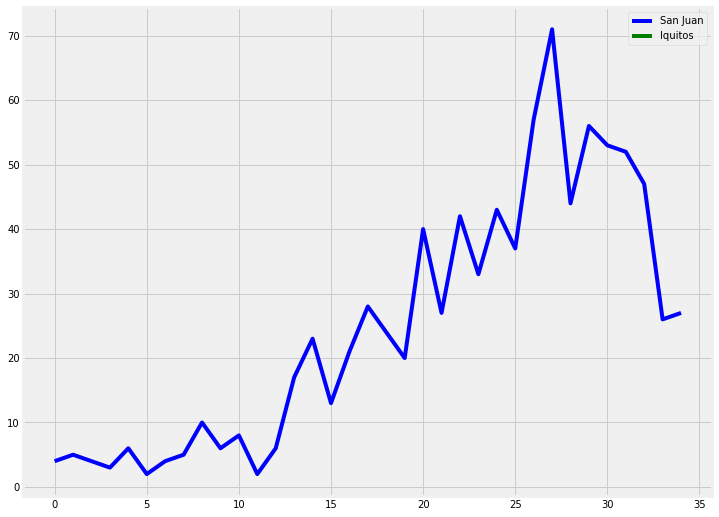

In [1716]:
#randomly plot one year only - 2004 
plt.figure(figsize=(11,9))
plt.plot(sj.loc[sj['year'] == 1990]['total_cases'],label="San Juan", color='b')
plt.plot(iq.loc[iq['year'] == 1990]['total_cases'],label="Iquitos", color='g')
plt.legend()


In [1717]:
#a look into rolling mean and std and the Dickey_Fuller test 

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=3).mean()
    rolstd = pd.Series(timeseries).rolling(window=3).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

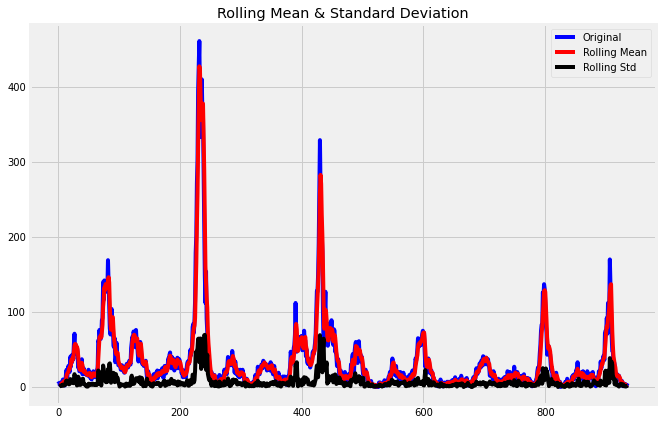

Results of Dickey-Fuller Test:
Test Statistic                -6.650078e+00
p-value                        5.147319e-09
#Lags Used                     9.000000e+00
Number of Observations Used    9.260000e+02
Critical Value (1%)           -3.437432e+00
Critical Value (5%)           -2.864666e+00
Critical Value (10%)          -2.568435e+00
dtype: float64


In [1718]:
plt.figure(figsize=(10,7))
test_stationarity(sj['total_cases'])

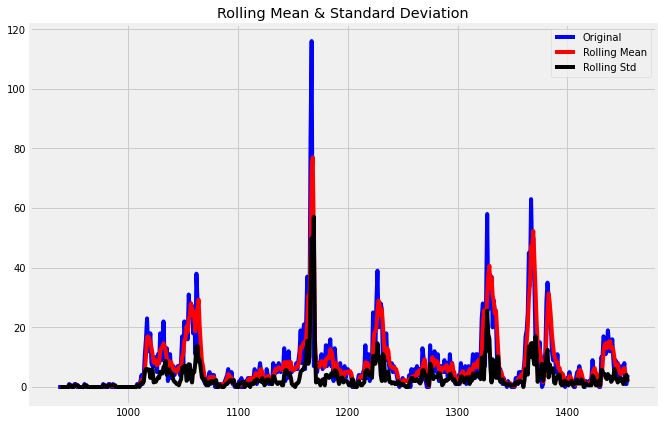

Results of Dickey-Fuller Test:
Test Statistic                -6.085429e+00
p-value                        1.067252e-07
#Lags Used                     4.000000e+00
Number of Observations Used    5.150000e+02
Critical Value (1%)           -3.443112e+00
Critical Value (5%)           -2.867168e+00
Critical Value (10%)          -2.569768e+00
dtype: float64


In [1719]:
plt.figure(figsize=(10,7))
test_stationarity(iq['total_cases'])

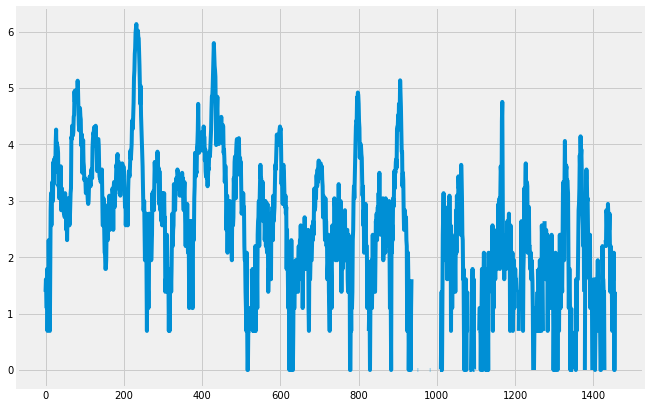

In [1720]:
#plot the log of the total cases
plt.figure(figsize=(10,7))
ts_log = np.log(trainmerge['total_cases'])
plt.plot(ts_log)

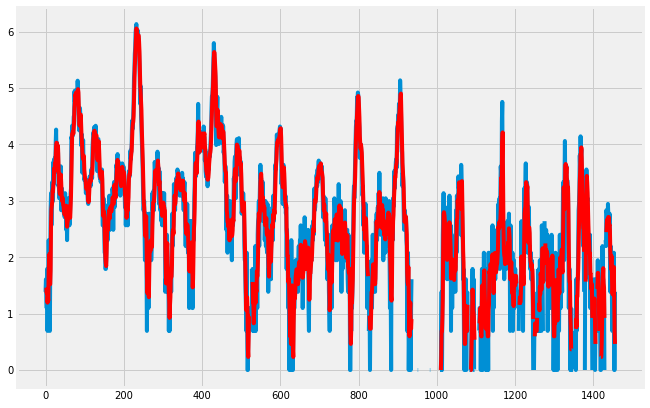

In [1721]:
#plot 3 week rolling mean of the log
plt.figure(figsize=(10,7))

moving_avg = pd.Series(ts_log).rolling(window=3).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [1722]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

0          NaN
1          NaN
2    -0.074381
3    -0.266169
4     0.366204
5    -0.501359
6     0.095894
7     0.379811
8     0.536479
9    -0.109501
10    0.021513
11   -0.828302
Name: total_cases, dtype: float64

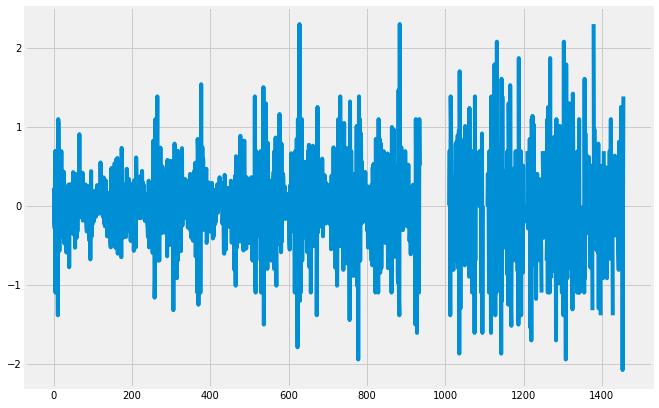

In [1723]:
#differencing
plt.figure(figsize=(10,7))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [1724]:
ts_log.replace([np.inf, -np.inf], np.nan)
ts_log.dropna(inplace=True)

In [1725]:
ts_log=ts_log+1


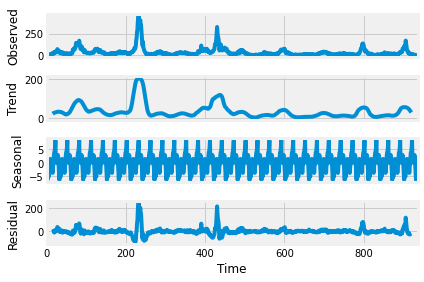

In [1726]:
#print decomposition of the time series
import statsmodels.api as sm

#decomposition = seasonal_decompose(ts_log.price.values, freq=30)
# deal with missing values. see issue
sj.total_cases.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(sj.total_cases.values, freq=30)
resplot = res.plot()

### Forecasting using ARIMA.

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

We will use a “grid search” to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality. Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest.


In [1727]:
final_sj.head()

year  weekofyear  ... reanalysis_relative_humidity_percent  total_cases
0  1990          18  ...                            73.365714            4
1  1990          19  ...                            77.368571            5
2  1990          20  ...                            82.052857            4
3  1990          21  ...                            80.337143            3
4  1990          22  ...                            80.460000            6

[5 rows x 12 columns]

In [1730]:
#span of record
final_sj['week_start_date'].min(), final_sj['week_start_date'].max()


(Timestamp('1990-04-30 00:00:00'), Timestamp('2008-04-22 00:00:00'))

In [1729]:
df = final_sj.copy()

In [1731]:
#drop all columns we dont need
d = ['year','weekofyear','ndvi_se','ndvi_sw',
       'station_avg_temp_c', 'station_max_temp_c', 'reanalysis_tdtr_k',
       'reanalysis_precip_amt_kg_per_m2', 'station_diur_temp_rng_c',
       'reanalysis_relative_humidity_percent']
df.drop(d, axis=1,inplace=True)
df = df.sort_values('week_start_date')
df.head()


week_start_date  total_cases
0      1990-04-30            4
1      1990-05-07            5
2      1990-05-14            4
3      1990-05-21            3
4      1990-05-28            6

In [1732]:
df.isnull().sum()


week_start_date    0
total_cases        0
dtype: int64

In [1733]:
#grouping by date
#df = df.groupby('week_start_date')['total_cases'].sum().reset_index()

df = df.groupby('week_start_date')
df = df['total_cases'].sum().reset_index()
df = df.set_index('week_start_date') 
df.head()

total_cases
week_start_date             
1990-04-30                 4
1990-05-07                 5
1990-05-14                 4
1990-05-21                 3
1990-05-28                 6

In [1734]:
df.total_cases

week_start_date
1990-04-30    4
1990-05-07    5
1990-05-14    4
1990-05-21    3
1990-05-28    6
             ..
2008-03-25    4
2008-04-01    3
2008-04-08    1
2008-04-15    3
2008-04-22    5
Name: total_cases, Length: 936, dtype: int64

In [1736]:
df['2008':]

total_cases
week_start_date             
2008-01-01                15
2008-01-08                14
2008-01-15                15
2008-01-22                10
2008-01-29                 9
2008-02-05                 2
2008-02-12                 6
2008-02-19                 8
2008-02-26                 5
2008-03-04                 1
2008-03-11                 2
2008-03-18                 3
2008-03-25                 4
2008-04-01                 3
2008-04-08                 1
2008-04-15                 3
2008-04-22                 5

Getting values for p,d,q

In [1738]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [1739]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10364.748479456091
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10023.502348664493
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:10232.42921746644
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:9818.841076184588
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:9982.375451346335
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:9967.744600514921
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10053.30928678513
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:9758.856469515049
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9335.682439021663
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9048.07065321297
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:9284.257729115605
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8855.996949722667
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:9019.07605369129
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8944.353241946985
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:9105.522177357476
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8809.607932018263
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7532.962093393695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7436.276953748936
ARIMA(0, 1

In [1174]:
#need floats for this to work
#final_sj['total_cases']=final_sj['total_cases'].astype(float)
#final_iq['total_cases']=final_iq['total_cases'].astype(float)

                             ARIMA Model Results                              
Dep. Variable:          D.total_cases   No. Observations:                  519
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1758.718
Method:                       css-mle   S.D. of innovations              7.139
Date:                Tue, 09 Feb 2021   AIC                           3525.437
Time:                        13:05:52   BIC                           3542.444
Sample:                             1   HQIC                          3532.100
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0127      0.008      1.609      0.108      -0.003       0.028
ar.L1.D.total_cases     0.7409      0.030     24.947      0.000       0.683       0.799
ma.L1.D.total_ca

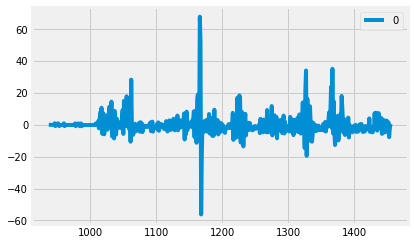

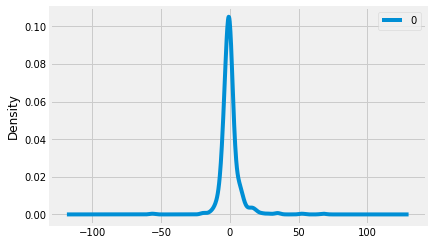

                0
count  519.000000
mean     0.206973
std      7.157414
min    -56.268661
25%     -2.510062
50%     -0.152695
75%      1.293598
max     67.857432


In [1740]:
from statsmodels.tsa.arima_model import ARIMA
#import pandas as pd
from pandas import DataFrame

model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())



If p<0.005 it means that there is a significance.

Test MSE: 5.914


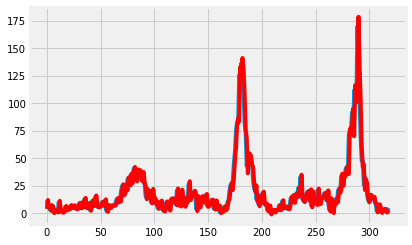

In [1741]:
from sklearn.metrics import mean_absolute_error

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = final_sj['total_cases']

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_absolute_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [1178]:
#check how far in the future to forecast
print(len(sj_test))
print(len(iq_test))

260
156


In [1744]:
#get the forecast for San Juan
sj_forecast= model_fit.forecast(260)
sj_forecast

(array([3.07423428, 3.12693891, 3.16431051, 3.1907622 , 3.20943693,
        3.22257305, 3.23176467, 3.2381471 , 3.24252886, 3.24548578,
        3.24742796, 3.24864746, 3.24935229, 3.24969056, 3.24976779,
        3.2496591 , 3.24941801, 3.24908263, 3.24868009, 3.24822972,
        3.24774529, 3.2472366 , 3.24671064, 3.24617237, 3.24562534,
        3.24507207, 3.24451435, 3.24395347, 3.24339034, 3.2428256 ,
        3.24225971, 3.24169302, 3.24112574, 3.24055805, 3.23999006,
        3.23942187, 3.23885353, 3.23828508, 3.23771655, 3.23714797,
        3.23657935, 3.23601071, 3.23544204, 3.23487337, 3.23430468,
        3.23373598, 3.23316728, 3.23259858, 3.23202987, 3.23146117,
        3.23089246, 3.23032375, 3.22975503, 3.22918632, 3.22861761,
        3.2280489 , 3.22748019, 3.22691148, 3.22634276, 3.22577405,
        3.22520534, 3.22463663, 3.22406791, 3.2234992 , 3.22293049,
        3.22236178, 3.22179306, 3.22122435, 3.22065564, 3.22008693,
        3.21951821, 3.2189495 , 3.21838079, 3.21

In [1745]:
len(sj_forecast)

3

Iquitos.

Test MSE: 4.587


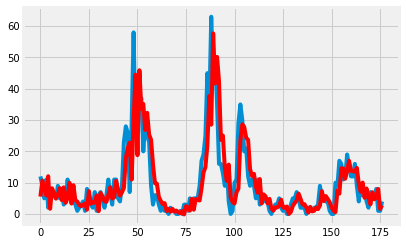

In [1180]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = final_iq['total_cases']

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_absolute_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [1181]:
final_iq_test.shape

(156, 10)

In [1182]:
#get forecast for Iquitos
iq_forecast= model_fit.forecast(156)
iq_forecast

(array([2.78944333, 3.12440227, 2.04934036, 2.45827257, 2.73025998,
        2.55976942, 2.42998813, 2.5738018 , 2.588017  , 2.53897724,
        2.54630736, 2.57901305, 2.57360118, 2.56975188, 2.58045225,
        2.58835718, 2.58949616, 2.59405295, 2.6005333 , 2.60519177,
        2.60930401, 2.61444256, 2.61953851, 2.62420566, 2.62898015,
        2.63393221, 2.63878715, 2.64358857, 2.6484448 , 2.65331329,
        2.65815324, 2.66299499, 2.66784895, 2.67269932, 2.67754492,
        2.68239337, 2.68724324, 2.69209151, 2.6969395 , 2.7017883 ,
        2.70663702, 2.7114854 , 2.71633389, 2.72118252, 2.72603106,
        2.73087956, 2.7357281 , 2.74057666, 2.74542519, 2.75027372,
        2.75512227, 2.75997081, 2.76481934, 2.76966788, 2.77451642,
        2.77936496, 2.7842135 , 2.78906204, 2.79391058, 2.79875911,
        2.80360765, 2.80845619, 2.81330473, 2.81815327, 2.82300181,
        2.82785035, 2.83269889, 2.83754742, 2.84239596, 2.8472445 ,
        2.85209304, 2.85694158, 2.86179012, 2.86

In [1183]:
len(iq_forecast[0])

156